In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def df2tex(df, tex_file_name):
    # print(df.to_latex())
    with open('./' + tex_file_name + '.tex', 'w') as tf:
        tf.write(df.to_latex())

# os.getcwd()

y_test = pd.read_csv("../../../assets/y_hats/univariate/y_test.csv", index_col=[0, 1, 2])

ind_cat.csv にない13企業

* 上場廃止, 合併 --> 日経コードでFQ検索 https://www.jpx.co.jp/listing/stocks/delisted/index.html

* 改名 --> 改名した後の名前を持ってくる https://www.jpx.co.jp/listing/others/changed/index.html

'エフ・ジェー・ネクスト': 8935, --> "ＦＪネクストホールディングス"

'ココカラファイン': 3098, --> 2021/09/29

'タケエイ': 2151, --> 2021/09/29

'ビオフェルミン製薬': 4517, --> 2021/07/28

'フルサト工業': 8087, --> 2021/09/29

'マツモトキヨシホールディングス': 3088, --> "マツキヨココカラ＆カンパニー"

'ヤマエ久野': 8108, --> 2021/09/29

'京都きもの友禅': 7615, --> "ＹＵ－ＷＡ　Ｃｒｅａｔｉｏｎ　Ｈｏｌｄｉｎｇｓ"

'前田建設工業': 1824, --> 2021/09/29

'前田道路': 1883, --> 2021/09/29

'協和エクシオ': 1951, --> "エクシオグループ"

'船井電機': 6839, --> 2021/08/26

'蛇の目ミシン工業': 6445 --> 'ジャノメ'



# 業種コードtable

In [5]:
ind_cat = pd.read_excel("../../../data/raw/FQ/CORPORATE/ind_cat_with_ommit_and_renamed_.xlsx")
ind_cat = ind_cat.drop([0, 1])
ind_cat = ind_cat.drop(["Unnamed: 2", "Unnamed: 3"], axis=1)
ind_cat = ind_cat.rename(columns={'Unnamed: 0': '企業名', 'Unnamed: 1': 'NKCODE'})
ind_cat = ind_cat.set_index("企業名")
# change old name
ind_cat = ind_cat.rename(index={
    "ＦＪネクストホールディングス": 'エフ・ジェー・ネクスト',
    "ココカラファイングループ": 'ココカラファイン',
    "マツキヨココカラ＆カンパニー": 'マツモトキヨシホールディングス',
    "ＹＵ－ＷＡ　Ｃｒｅａｔｉｏｎ": '京都きもの友禅',
    "エクシオグループ": '協和エクシオ',
    "ジャノメ": '蛇の目ミシン工業'
    })
ind_cat = ind_cat.loc[y_test.index.get_level_values(0).unique()].drop_duplicates()    
ind_cat.to_csv("ind_cat.csv")

In [6]:
# ind_cat["東証業種名（漢字）"].value_counts().to_csv("ind_cat_table.csv")
cat_name = ind_cat["東証業種名（漢字）"].value_counts().reset_index()
cat_name.columns = ["業種名", "企業数"]
cat_code = ind_cat["東証業種コード"].value_counts().reset_index()
cat_code.columns = ["業種コード", "企業数"]
cat_code = cat_code["業種コード"]
ind_cat_table = pd.concat([cat_code, cat_name], axis=1)
ind_cat_table = ind_cat_table.set_index("業種コード")
ind_cat_table.to_csv("ind_cat_table.csv")
df2tex(ind_cat_table, "ind_cat_table")

# 変数の記述統計

In [7]:
tidy_df = pd.read_csv("../../../data/processed/tidy_df.csv", index_col=[0, 1, 2])
tidy_df

決算発表日 事業年度開始年月日［３ヵ月］   事業年度終了年月日        EPS         INV  \
企業名   会計年度 四半期                                                                 
あらた   2008 Q1   2008-08-12     2008-04-01  2008-06-30   2.660000  400.874539   
           Q2   2008-11-12     2008-07-01  2008-09-30   2.420000  354.438952   
           Q3   2009-02-12     2008-10-01  2008-12-31   3.140000  463.063689   
           Q4   2009-05-15     2009-01-01  2009-03-31  -5.480000  352.113272   
      2009 Q1   2009-08-10     2009-04-01  2009-06-30   6.780000  342.920625   
...                    ...            ...         ...        ...         ...   
ｅＢＡＳＥ 2019 Q4   2020-05-15     2020-01-01  2020-03-31  18.657982    0.042405   
      2020 Q1   2020-07-31     2020-04-01  2020-06-30   2.010000    0.084809   
           Q2   2020-10-30     2020-07-01  2020-09-30   3.810000    0.086835   
           Q3   2021-01-29     2020-10-01  2020-12-31   3.070000    0.108546   
           Q4   2021-05-14            NaN  2021-03-31   9.989365    0.108580   

                         AR       CAPX          GM          SA       ETR  \
企業名   会計年度 四半期                                                             
あらた   2008 Q1   1097.393673   9.570469  277.799816  282.517228  0.667780   
           Q2    947.010117  13.330285  245.357228  247.716689  0.645914   
           Q3   1227.472337  24.209869  257.865737  255.535304  0.734463   
           Q4    937.498755  27.924985  224.785468  237.362369 -0.300633   
      2009 Q1    992.622168   5.478945  258.643522  255.350823  0.546833   
...                     ...        ...         ...         ...       ...   
ｅＢＡＳＥ 2019 Q4     40.920347   0.657270   38.291268   11.194789  0.282680   
      2020 Q1     12.615340   0.148416    8.268878    5.533788  0.321168   
           Q2     11.527380   0.151962   11.201748    5.861380  0.308300   
           Q3     11.744667   0.314783   10.181606    5.839770  0.315534   
           Q4     18.328314   0.314882   19.848434    6.015335  0.281931   

                       LF  
企業名   会計年度 四半期             
あらた   2008 Q1   17.678254  
           Q2   17.681603  
           Q3   17.765127  
           Q4   17.575437  
      2009 Q1   17.707993  
...                   ...  
ｅＢＡＳＥ 2019 Q4   15.012871  
      2020 Q1   14.510928  
           Q2   14.653348  
           Q3   14.605000  
           Q4   14.970051  

[52156 rows x 11 columns]

In [33]:
var_sum_table = tidy_df.describe().round(3)
var_sum_table

,EPS,INV,AR,CAPX,GM,SA,ETR,LF
count,52156.000,52156.000,52156.000,52156.000,52156.000,52156.000,52156.000,52156.000
mean,67.468,808.786,1272.915,173.152,513.363,385.510,0.339,16.205
std,707.529,7234.778,8087.579,2387.784,3577.896,2699.862,5.835,0.793
min,-37300.500,0.011,0.026,0.001,-30368.482,-482.938,-494.716,11.628
25%,3.490,91.615,181.897,9.296,53.156,39.603,0.241,15.662
50%,15.230,193.908,357.978,24.741,115.768,83.523,0.331,16.154
75%,37.540,415.649,717.761,64.527,222.790,166.317,0.414,16.693
max,31202.830,404482.462,293004.896,143224.390,104813.930,87333.561,817.750,22.531


In [34]:
# output
var_sum_table.to_csv("var_sum_table.csv")
df2tex(var_sum_table, "var_sum_table")

In [9]:
# EPSのmin, ETRのminがやばくね? 極地上下0.5%を含む企業は落とすべき?
tidy_df[tidy_df["EPS"] == tidy_df["EPS"].min()]

,,,決算発表日,事業年度開始年月日［３ヵ月］,事業年度終了年月日,EPS,INV,AR,CAPX,GM,SA,ETR,LF
企業名,会計年度,四半期,,,,,,,,,,,
サンフロンティア不動産,2008,Q3,2009-01-29,2008-10-01,2008-12-31,-37300.5,89880.692016,271.497308,36.199641,-30368.482179,2452.525679,-0.119117,17.330149


In [10]:
tidy_df[tidy_df["ETR"] == tidy_df["ETR"].min()]

,,,決算発表日,事業年度開始年月日［３ヵ月］,事業年度終了年月日,EPS,INV,AR,CAPX,GM,SA,ETR,LF
企業名,会計年度,四半期,,,,,,,,,,,
ソニーグループ,2011,Q4,2012-05-10,2012-01-01,2012-03-31,-254.3,704.531013,837.925694,381.185025,490.327487,353.409413,-494.716049,16.101628


# 予測結果の精度指標テーブル

In [46]:
a_by_q = pd.read_csv("/mnt/d/0ngoing/thesis/repo/assets/y_hats/accuracy_table_by_quarter.csv", header=[0, 1], index_col=[0])

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
    ]

a_by_q.index = model_name_tex
a_by_q.index.name = "Model"

In [47]:
a_by_q

Q1                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
U-RW         44.177999  0.667961  0.571602               42.572283   
U-SRW        27.129874  0.547188  0.436098               27.750083   
U-ARIMA-F    32.594719  0.549307  0.437065               29.511466   
U-ARIMA-G    37.744783  0.567171  0.460411               32.436025   
U-ARIMA-BR   36.398344  0.559248  0.445051               29.312064   
M-OLS1       64.117899  0.625642  0.526797               38.750415   
M-OLS2       62.459135  0.613139  0.513546               38.019276   
M-OLS3      333.789616  0.821006  0.769060               67.929545   
U-RIDGE      41.878437  0.575821  0.469060               33.466268   
U-LASSO      35.156657  0.591401  0.473526               28.946494   
U-EN         33.964159  0.580585  0.462060               28.381522   
U-RF         27.094528  0.548152  0.435220               28.780326   
U-NN         50.729606  0.624017  0.515092               34.396810   
M-RIDGE      38.071524  0.527338  0.418725               29.278830   
M-LASSO      23.601855  0.490284  0.374053               23.097375   
M-EN         22.946582  0.479456  0.362047               21.801263   
M-RF         24.656640  0.495290  0.381875               25.722832   
M-NN         35.837962  0.588084  0.479634               33.665670   

                    Q2                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
U-RW         27.604332  0.529496  0.408363               25.722832   
U-SRW        27.380317  0.504634  0.389929               23.795281   
U-ARIMA-F    25.696189  0.480307  0.362174               22.432702   
U-ARIMA-G    30.888611  0.480661  0.366334               23.861748   
U-ARIMA-BR   29.178384  0.482416  0.361848               22.465936   
M-OLS1       50.599140  0.555624  0.447234               32.003988   
M-OLS2       44.044493  0.548970  0.438593               30.774344   
M-OLS3      278.607442  0.797900  0.738445               63.808574   
U-RIDGE      35.434770  0.506465  0.391059               26.188102   
U-LASSO      31.027833  0.530447  0.400965               21.635095   
U-EN         30.708916  0.518741  0.389649               21.435693   
U-RF         24.969618  0.480255  0.357739               22.200066   
U-NN         49.401513  0.579548  0.459717               28.248588   
M-RIDGE      33.862181  0.483177  0.374206               25.124626   
M-LASSO      23.494656  0.438149  0.320945               19.109339   
M-EN         22.732379  0.424552  0.307651               18.178797   
M-RF         21.234936  0.412904  0.295279               17.879694   
M-NN         36.752937  0.533806  0.415543               27.085410   

                    Q3                                              \
                   MAE      MAPE      MSPE Large Forecast Error(%)   
Model                                                                
U-RW         29.684183  0.498674  0.372378               22.333001   
U-SRW        26.259539  0.460760  0.338351               20.405450   
U-ARIMA-F    28.320841  0.476531  0.354890               21.402459   
U-ARIMA-G    33.190608  0.487637  0.369995               23.462944   
U-ARIMA-BR   30.086726  0.470805  0.347547               21.003656   
M-OLS1       40.428662  0.528447  0.414324               27.351279   
M-OLS2       77.543468  0.569359  0.461223               32.436025   
M-OLS3      263.912333  0.789605  0.726668               62.013958   
U-RIDGE      36.956940  0.498808  0.373282               22.200066   
U-LASSO      33.876309  0.520989  0.384578               18.444666   
U-EN         32.681038  0.510022  0.371649               17.680292   
U-RF         26.562091  0.464134  0.337566               19.209040   
U-NN         49.405613  0.55

In [50]:
# round float
a_by_q.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]] = a_by_q.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]].round(1)

a_by_q.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]] = a_by_q.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]].round(3)

In [51]:
a_by_q

Q1                                           Q2                \
              MAE   MAPE   MSPE Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                                          
U-RW         44.2  0.668  0.572                    42.6   27.6  0.529  0.408   
U-SRW        27.1  0.547  0.436                    27.8   27.4  0.505  0.390   
U-ARIMA-F    32.6  0.549  0.437                    29.5   25.7  0.480  0.362   
U-ARIMA-G    37.7  0.567  0.460                    32.4   30.9  0.481  0.366   
U-ARIMA-BR   36.4  0.559  0.445                    29.3   29.2  0.482  0.362   
M-OLS1       64.1  0.626  0.527                    38.8   50.6  0.556  0.447   
M-OLS2       62.5  0.613  0.514                    38.0   44.0  0.549  0.439   
M-OLS3      333.8  0.821  0.769                    67.9  278.6  0.798  0.738   
U-RIDGE      41.9  0.576  0.469                    33.5   35.4  0.506  0.391   
U-LASSO      35.2  0.591  0.474                    28.9   31.0  0.530  0.401   
U-EN         34.0  0.581  0.462                    28.4   30.7  0.519  0.390   
U-RF         27.1  0.548  0.435                    28.8   25.0  0.480  0.358   
U-NN         50.7  0.624  0.515                    34.4   49.4  0.580  0.460   
M-RIDGE      38.1  0.527  0.419                    29.3   33.9  0.483  0.374   
M-LASSO      23.6  0.490  0.374                    23.1   23.5  0.438  0.321   
M-EN         22.9  0.479  0.362                    21.8   22.7  0.425  0.308   
M-RF         24.7  0.495  0.382                    25.7   21.2  0.413  0.295   
M-NN         35.8  0.588  0.480                    33.7   36.8  0.534  0.416   

                                       Q3                \
           Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                     
U-RW                          25.7   29.7  0.499  0.372   
U-SRW                         23.8   26.3  0.461  0.338   
U-ARIMA-F                     22.4   28.3  0.477  0.355   
U-ARIMA-G                     23.9   33.2  0.488  0.370   
U-ARIMA-BR                    22.5   30.1  0.471  0.348   
M-OLS1                        32.0   40.4  0.528  0.414   
M-OLS2                        30.8   77.5  0.569  0.461   
M-OLS3                        63.8  263.9  0.790  0.727   
U-RIDGE                       26.2   37.0  0.499  0.373   
U-LASSO                       21.6   33.9  0.521  0.385   
U-EN                          21.4   32.7  0.510  0.372   
U-RF                          22.2   26.6  0.464  0.338   
U-NN                          28.2   49.4  0.554  0.430   
M-RIDGE                       25.1   36.6  0.468  0.355   
M-LASSO                       19.1   24.3  0.422  0.302   
M-EN                          18.2   23.7  0.417  0.296   
M-RF                          17.9   22.7  0.408  0.287   
M-NN                          27.1   33.0  0.517  0.392   

                                       Q4                \
           Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                     
U-RW                          22.3   47.9  0.621  0.514   
U-SRW                         20.4   47.2  0.573  0.464   
U-ARIMA-F                     21.4   46.7  0.573  0.463   
U-ARIMA-G                     23.5   50.2  0.570  0.461   
U-ARIMA-BR                    21.0   47.7  0.564  0.452   
M-OLS1                        27.4   60.9  0.603  0.499   
M-OLS2                        32.4   84.4  0.625  0.526   
M-OLS3                        62.0  225.4  0.797  0.733   
U-RIDGE                       22.2   49.7  0.575  0.464   
U-LASSO                       18.4   45.5  0.592  0.473   
U-EN                          17.7   45.6  0.591  0.471   
U-RF                          19.2   40.8  0.561  0.445   
U-NN                          25.7   60.5  0.626  0.516   
M-RIDGE                       24.2   45.7  0.534  0.429   
M-LASSO                       17.2   38.1  0.495  0.382   
M-EN                          16

In [39]:
a_by_q.to_csv("accuracy.csv")
df2tex(a_by_q, "accuracy")

In [41]:
# print(a_by_q.to_latex())

In [ ]:
# with open('./' + tex_file_name + '.tex', 'w') as tf:
#     tf.write(df.to_latex())

In [43]:
a_by_q_ibes = pd.read_csv("/mnt/d/0ngoing/thesis/repo/assets/y_hats/accuracy_table_by_quarter_vsibes.csv", header=[0, 1], index_col=[0])

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
    "IBES"
    ]

a_by_q_ibes.index = model_name_tex
a_by_q_ibes.index.name = "Model"

# round float
a_by_q_ibes.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]] = a_by_q_ibes.loc[:, pd.IndexSlice[:, ["MAE", "Large Forecast Error(%)"]]].round(1)
a_by_q_ibes.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]] = a_by_q_ibes.loc[:, pd.IndexSlice[:, ["MAPE", "MSPE"]]].round(3)

In [44]:
a_by_q_ibes

Q1                                           Q2                \
              MAE   MAPE   MSPE Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                                          
U-RW         46.0  0.586  0.465                    29.2   31.9  0.463  0.340   
U-SRW        35.9  0.491  0.372                    23.9   29.4  0.443  0.330   
U-ARIMA-F    36.6  0.487  0.374                    24.2   25.8  0.414  0.301   
U-ARIMA-G    37.2  0.522  0.405                    27.3   29.8  0.427  0.321   
U-ARIMA-BR   35.8  0.498  0.380                    22.7   27.1  0.420  0.303   
M-OLS1       49.7  0.574  0.458                    29.9   40.7  0.481  0.368   
M-OLS2       46.9  0.550  0.438                    29.2   39.1  0.480  0.366   
M-OLS3      261.9  0.777  0.712                    60.6  197.9  0.780  0.712   
U-RIDGE      38.1  0.516  0.399                    26.5   31.7  0.435  0.311   
U-LASSO      35.2  0.529  0.403                    24.2   28.1  0.431  0.296   
U-EN         34.9  0.522  0.395                    23.9   27.7  0.424  0.292   
U-RF         34.2  0.510  0.389                    26.1   28.7  0.413  0.283   
U-NN         43.3  0.581  0.458                    27.3   35.8  0.507  0.375   
M-RIDGE      48.2  0.509  0.402                    28.0   41.9  0.490  0.379   
M-LASSO      25.0  0.432  0.315                    18.6   22.4  0.389  0.263   
M-EN         25.8  0.426  0.310                    18.2   24.0  0.404  0.277   
M-RF         26.3  0.439  0.320                    19.7   22.6  0.375  0.262   
M-NN         41.0  0.536  0.414                    28.0   36.1  0.505  0.381   
IBES         29.1  0.426  0.298                    15.9   26.8  0.390  0.262   

                                       Q3                \
           Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                     
U-RW                          21.6   39.7  0.443  0.317   
U-SRW                         22.3   41.8  0.454  0.331   
U-ARIMA-F                     19.7   41.6  0.457  0.337   
U-ARIMA-G                     21.6   41.4  0.467  0.344   
U-ARIMA-BR                    18.2   36.9  0.434  0.309   
M-OLS1                        26.5   46.5  0.487  0.368   
M-OLS2                        24.6   85.5  0.507  0.385   
M-OLS3                        59.8  207.2  0.747  0.672   
U-RIDGE                       20.8   41.7  0.463  0.334   
U-LASSO                       16.7   38.5  0.471  0.335   
U-EN                          16.3   38.2  0.466  0.327   
U-RF                          17.4   38.6  0.460  0.322   
U-NN                          22.0   43.5  0.508  0.373   
M-RIDGE                       25.4   44.9  0.461  0.346   
M-LASSO                       13.6   30.7  0.391  0.276   
M-EN                          14.8   31.3  0.407  0.291   
M-RF                          17.4   34.1  0.396  0.275   
M-NN                          25.0   41.3  0.483  0.355   
IBES                          13.6   33.1  0.385  0.253   

                                       Q4                \
           Large Forecast Error(%)    MAE   MAPE   MSPE   
Model                                                     
U-RW                          18.2   58.9  0.625  0.528   
U-SRW                         20.5   57.4  0.602  0.496   
U-ARIMA-F                     20.8   55.6  0.602  0.490   
U-ARIMA-G                     21.6   56.5  0.607  0.498   
U-ARIMA-BR                    18.2   51.3  0.583  0.471   
M-OLS1                        22.7   69.0  0.597  0.486   
M-OLS2                        25.4   68.1  0.641  0.548   
M-OLS3                        54.9  219.0  0.780  0.714   
U-RIDGE                       19.3   49.0  0.592  0.479   
U-LASSO                       17.0   44.9  0.587  0.468   
U-EN                          15.9   44.6  0.584  0.465   
U-RF                          17.0   46.9  0.568  0.451   
U-NN                          20.8   54.0  0.635  0.525   
M-RIDGE    

In [45]:
a_by_q_ibes.to_csv("accuracy_ibes.csv")
df2tex(a_by_q_ibes, "accuracy_ibes")

In [45]:
# pd.read_csv("../../../assets/y_hats/y_hats_all_vsibes.csv", index_col=[0, 1, 2])

# DM検定 Ridge plot
https://seaborn.pydata.org/examples/kde_ridgeplot.html

https://www.google.com/search?q=seaborn%20ridgeline%20plot&tbm=isch&ictx=1&tbs=rimg:CZB96faRZG0AIgiQfen2kWRtACoSCZB96faRZG0AEWnYtZXHXstB&hl=en&sa=X&ved=0CAEQiRxqFwoTCKDMvbeszvQCFQAAAAAdAAAAABAI&biw=1825&bih=977

https://seita.nl/2019/10/22/how-to-plot-probabilistic-forecasts/

In [30]:
# height and aspect for single ridgeplot
h = 0.75
asp = 10

In [31]:
# prepare data
dm_stats = pd.read_csv("./../../../assets/DM_test_result/dm_stats_MAD_y_hat_srw.csv")

model2_list = [
    '(1) y_hat_srw vs (2) y_hat_rw',
    '(1) y_hat_srw vs (2) y_hat_sarima_f',
    '(1) y_hat_srw vs (2) y_hat_sarima_g',
    '(1) y_hat_srw vs (2) y_hat_sarima_br',
    '(1) y_hat_srw vs (2) y_hat_ols1',
    '(1) y_hat_srw vs (2) y_hat_ols2',
    '(1) y_hat_srw vs (2) y_hat_ols3', 
    '(1) y_hat_srw vs (2) y_hat_ul2', 
    '(1) y_hat_srw vs (2) y_hat_ul1',
    '(1) y_hat_srw vs (2) y_hat_uen',
    '(1) y_hat_srw vs (2) y_hat_uraf',
    '(1) y_hat_srw vs (2) y_hat_umlp',
    '(1) y_hat_srw vs (2) y_hat_ml2',
    '(1) y_hat_srw vs (2) y_hat_ml1',
    '(1) y_hat_srw vs (2) y_hat_men',    
    '(1) y_hat_srw vs (2) y_hat_mraf',
    '(1) y_hat_srw vs (2) y_hat_mmlp',
]

model_name_tex = [
    "U-RW",
    # "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
]

dm_stats = dm_stats[dm_stats["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_stats["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# order pair
# https://note.nkmk.me/python-pandas-sort-in-any-order/
dm_stats['order'] = dm_stats['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_stats = dm_stats.sort_values('order')

/home/wang_sihan/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


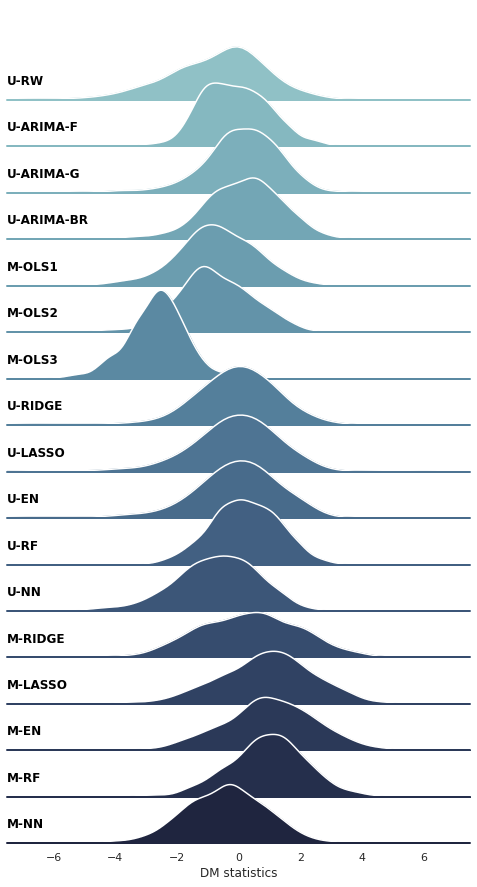

In [32]:
# plot Ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize FaceGrid object
# sns.palplot(sns.cubehelix_palette(len(dm_stats["pair"].unique()), rot=-.25, light=.7))
pal = sns.cubehelix_palette(len(dm_stats["pair"].unique()), rot=-.25, light=.7)
g = sns.FacetGrid(dm_stats, row="pair", hue="pair", aspect=asp, height=h, palette=pal)
plt.xlim(-7.5, 7.5) # x軸を-5 ~ 5に制限(本当はもっとある)

# plot kde
# g.map_dataframe(sns.histplot, x="DM")
# g.map_dataframe(sns.kdeplot, x="DM")
g.map_dataframe(sns.kdeplot, x="DM", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="DM", color="w")

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "pair")

# overlapping
g.fig.subplots_adjust(hspace=-.5)

# Hide yticks
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlabel="DM statistics")
g.despine(bottom=True, left=True)

# plt.tight_layout() # overlapping が消える
g.savefig("./_dm_stats_dist_MAD_y_hat_srw.pdf", dpi=300)

# DM p count Heatmap

In [33]:
# prepare data
dm_p_count = pd.read_csv("./../../../assets/DM_test_result/dm_p_count_MAD_y_hat_srw.csv")

dm_p_count = dm_p_count[dm_p_count["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_p_count["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# reorder pair
dm_p_count['order'] = dm_p_count['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_p_count = dm_p_count.sort_values('order')
dm_p_count.set_index("pair", inplace=True)

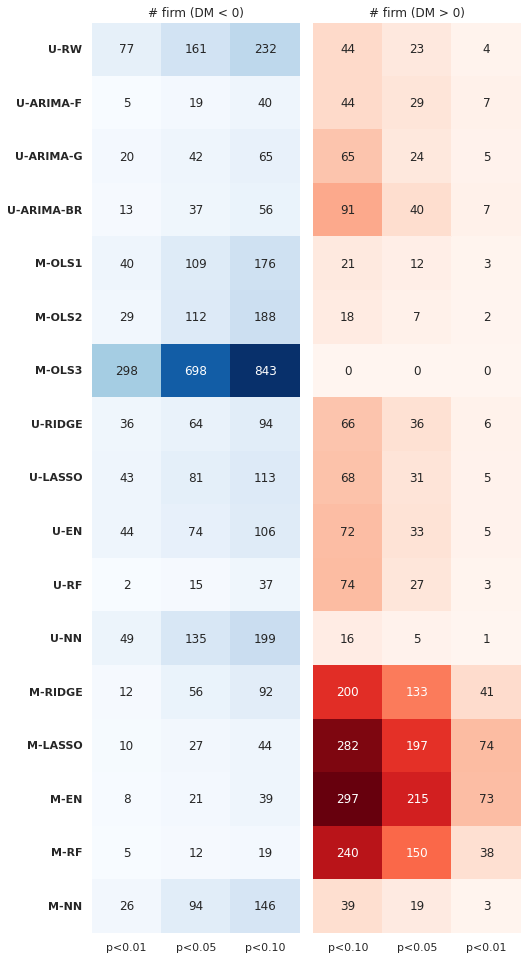

In [34]:
# plot count heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(h * asp, h * dm_p_count.shape[0] + h))
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(h * asp, h * dm_p_count.shape[0] + fontsize))

sns.heatmap(dm_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[0], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, cbar_kws={})
sns.heatmap(dm_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False)

axs[0].set_title("# firm (DM < 0)")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])#, rotation=45, ha='right')
axs[1].set_title("# firm (DM > 0)")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])#, rotation=45, ha='right')

yticks = dm_p_count.index
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right', weight='bold')

fig.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
plt.savefig("./_dm_p_count_MAD_y_hat_srw.pdf", dpi=300)

In [35]:
# # plot count (percentage) heatmap 
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

# sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/1089) * 100, cmap='Blues', ax=axs[0], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, cbar_kws={})
# sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/1089) * 100, cmap='Reds', ax=axs[1], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, yticklabels=False)

# fig.suptitle("Firm Count (%)s (percentage) by significance level: method (1): " + m1)
# axs[0].set_title("% negative statistically significant firm")
# axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
# axs[1].set_title("% positive statistically significant firm")
# axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

# yticks = [x.split()[-1] for x in dm_p_count.index]
# axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

# fig.subplots_adjust(wspace=0, hspace=0)

# plt.show()

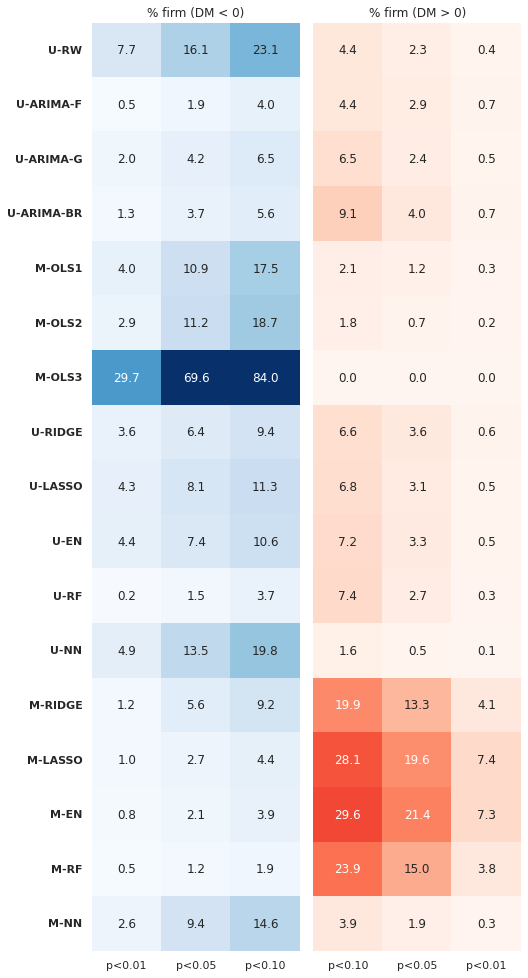

In [36]:
# plot count heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(h * asp, h * dm_p_count.shape[0] + 1.0))
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(h * asp, h * dm_p_count.shape[0] + fontsize))

num_firm = dm_stats[dm_stats["pair"] == "U-RW"].shape[0]
sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/num_firm) * 100, cmap='Blues', ax=axs[0], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, cbar_kws={})
sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/num_firm) * 100, cmap='Reds', ax=axs[1], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=False)

# fig.suptitle("Firm Count (%)s by significance level: method (1): " + m1)
axs[0].set_title("% firm (DM < 0)")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])#, rotation=45, ha='right')
axs[1].set_title("% firm (DM > 0)")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])#, rotation=45, ha='right')

yticks = dm_p_count.index
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right', weight='bold')

fig.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
plt.savefig("./_dm_p_percent_MAD_y_hat_srw.pdf", dpi=300)

# GridSpec
https://codequs.com/p/S1nvmy7F4

https://qiita.com/simonritchie/items/da54ff0879ad8155f441

https://stackoverflow.com/questions/43120429/colorbar-as-a-subplot-in-gridspec-python-change-size

## MAD (1) = U-SRW

In [30]:
# prepare data
dm_stats = pd.read_csv("./../../../assets/DM_test_result/dm_stats_MAD_y_hat_srw.csv")

model2_list = [
    '(1) y_hat_srw vs (2) y_hat_rw',
    '(1) y_hat_srw vs (2) y_hat_sarima_f',
    '(1) y_hat_srw vs (2) y_hat_sarima_g',
    '(1) y_hat_srw vs (2) y_hat_sarima_br',
    '(1) y_hat_srw vs (2) y_hat_ols1',
    '(1) y_hat_srw vs (2) y_hat_ols2',
    '(1) y_hat_srw vs (2) y_hat_ols3', 
    '(1) y_hat_srw vs (2) y_hat_ul2', 
    '(1) y_hat_srw vs (2) y_hat_ul1',
    '(1) y_hat_srw vs (2) y_hat_uen',
    '(1) y_hat_srw vs (2) y_hat_uraf',
    '(1) y_hat_srw vs (2) y_hat_umlp',
    '(1) y_hat_srw vs (2) y_hat_ml2',
    '(1) y_hat_srw vs (2) y_hat_ml1',
    '(1) y_hat_srw vs (2) y_hat_men',    
    '(1) y_hat_srw vs (2) y_hat_mraf',
    '(1) y_hat_srw vs (2) y_hat_mmlp',
]

model_name_tex = [
    "U-RW",
    # "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
]

dm_stats = dm_stats[dm_stats["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_stats["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# order pair
# https://note.nkmk.me/python-pandas-sort-in-any-order/
dm_stats['order'] = dm_stats['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_stats = dm_stats.sort_values('order')

# number of firm (for percentage count)
num_firm = dm_stats[dm_stats["pair"] == "U-RW"].shape[0]

# prepare data
dm_p_count = pd.read_csv("./../../../assets/DM_test_result/dm_p_count_MAD_y_hat_srw.csv")

dm_p_count = dm_p_count[dm_p_count["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_p_count["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# reorder pair
dm_p_count['order'] = dm_p_count['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_p_count = dm_p_count.sort_values('order')
dm_p_count.set_index("pair", inplace=True)

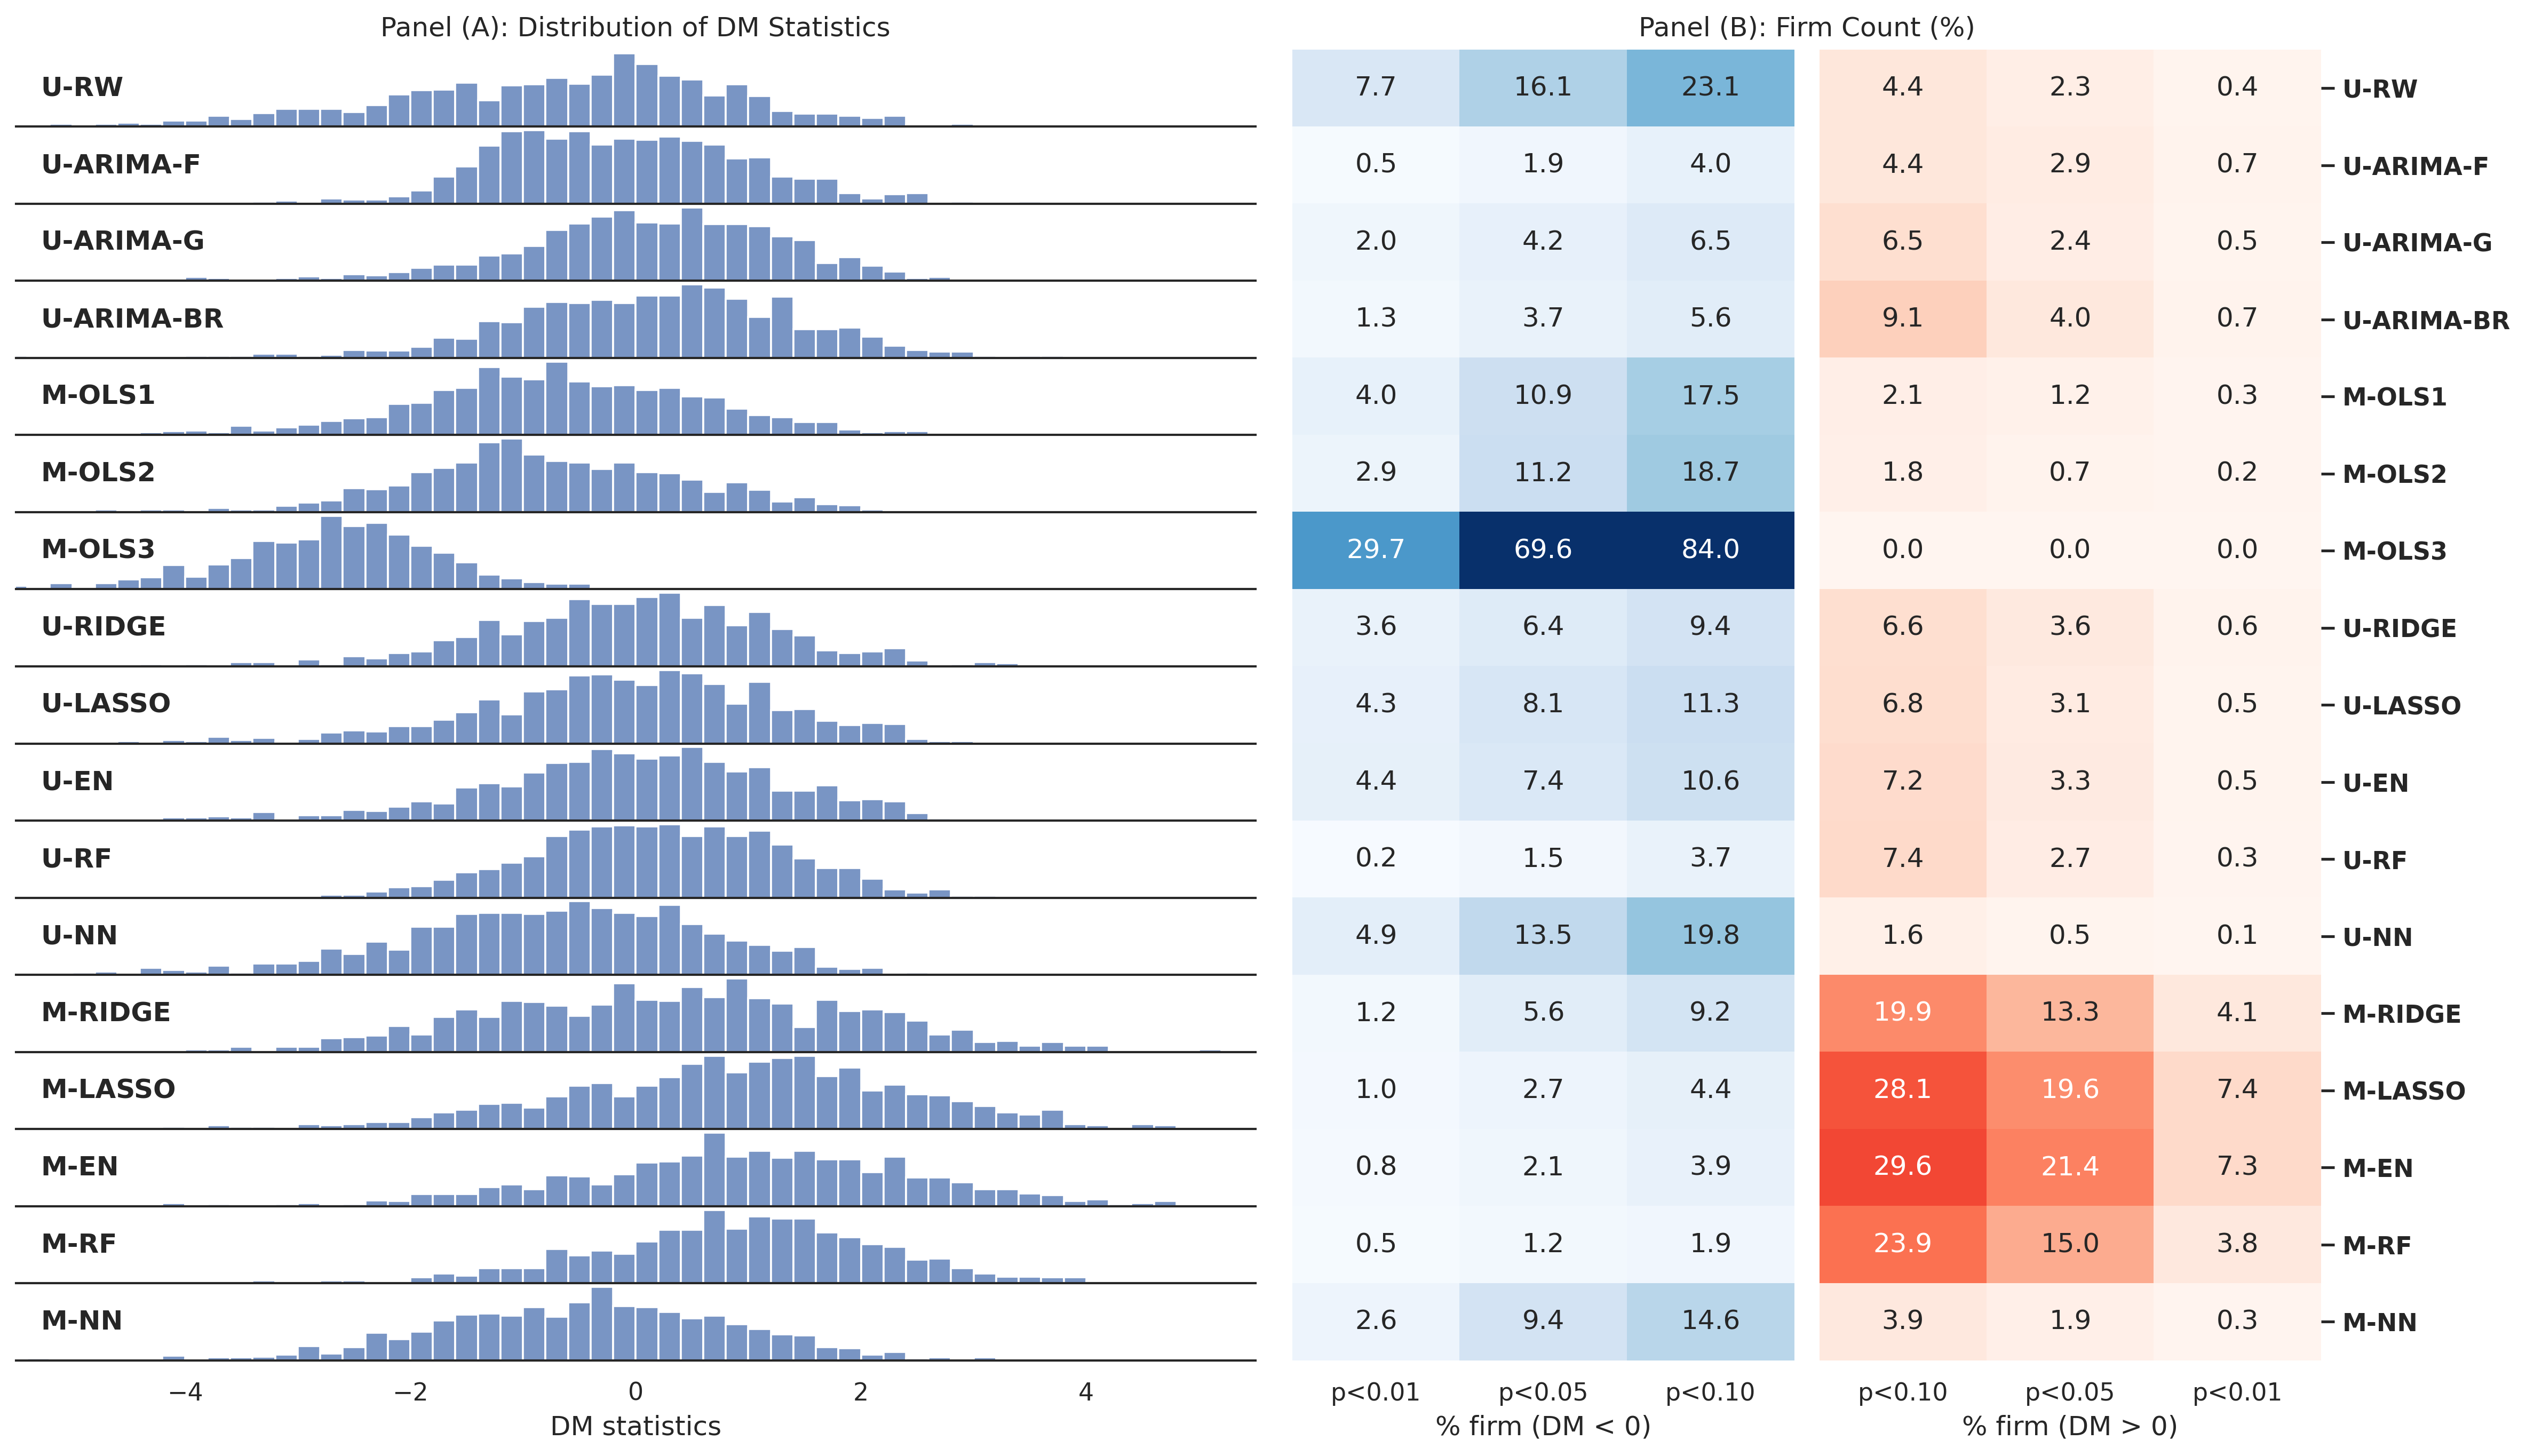

In [31]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model2 = dm_stats["pair"].unique().shape[0]

# single facet の ax のデザイン
def ax_settings(ax, model_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)

    ax.text(0.02, 0.4, model_name, fontsize=None, fontweight="bold", transform = ax.transAxes) 
    return None

# 画像全体のサイズを指定（縦, 横）。
fig = plt.figure(figsize=(16, 9), dpi=300)

# 全体のGridSpec。
gs = GridSpec(
    nrows=num_model2, 
    ncols=3, 
    width_ratios=[2.5, 1, 1], 
    height_ratios=[1]*num_model2, 
    wspace=0.05, 
    hspace=0
    )

# Ridgeline
gs_1 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=1, subplot_spec=gs[:, 0], hspace=0)
# ridgeline の数 + heatmap 2個 の空 ax リスト を作成
axs = [None]*(num_model2 + 2)
# Ridgeline の ax をループで作成
for i in range(num_model2):
    axs[i] = fig.add_subplot(gs_1[i, 0])
    ax_settings(axs[i], model_name_tex[i], -5.5, 5.5)
    # histogram
    sns.histplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], bins='auto', binwidth=0.2, binrange=(-6, 6))
    # kernel density
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], fill=True, alpha=0.5)
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], color="black")

    # 最後のridgeline以外x軸無し
    if i < (num_model2 - 1): 
        axs[i].set_xticks([])
        axs[i].set_xlabel("")
    
    if i == num_model2 - 1:
        axs[i].set_xlabel("DM statistics")

# Heatmap
gs_2 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=2, subplot_spec=gs[:, 1:], wspace=0.05)
# DM < 0
axs[-2] = fig.add_subplot(gs_2[:, 0])
# count
# sns.heatmap(dm_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[-2], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False, cbar_kws={})
# axs[-2].set_title("# firm (DM < 0)")
# percentage
sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/num_firm) * 100, cmap='Blues', ax=axs[-2], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=False, cbar_kws={})
axs[-2].tick_params(bottom=False)
axs[-2].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])
axs[-2].set_xlabel("% firm (DM < 0)")

# DM > 0
axs[-1] = fig.add_subplot(gs_2[:, 1])
# count
# sns.heatmap(dm_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[-1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=True)
# axs[-1].set_title("# firm (DM > 0)")
# percentage
sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/num_firm) * 100, cmap='Reds', ax=axs[-1], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=True) 
axs[-1].tick_params(bottom=False)
axs[-1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])
axs[-1].set_xlabel("% firm (DM > 0)")
axs[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
axs[-1].set_yticklabels(labels=dm_p_count.index, rotation=0, ha='left', weight='bold')

# Add ghost axes and titles on gs_1 and gs_2
ax_left = fig.add_subplot(gs_1[:])
ax_left.axis('off')
ax_left.set_title('Panel (A): Distribution of DM Statistics')

ax_right = fig.add_subplot(gs_2[:])
ax_right.axis('off')
ax_right.set_title('Panel (B): Firm Count (%)')

# set margins https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(left=0, right=None, bottom=0.06, top=0.97)
plt.savefig("./_dm_MAD_y_hat_srw.pdf")

## MAD (1) = U-ARIMA-BR

In [32]:
# prepare data
dm_stats = pd.read_csv("./../../../assets/DM_test_result/dm_stats_MAD_y_hat_sarima_br.csv")

model2_list = [
    '(1) y_hat_sarima_br vs (2) y_hat_rw',
    '(1) y_hat_sarima_br vs (2) y_hat_srw',
    '(1) y_hat_sarima_br vs (2) y_hat_sarima_f',
    '(1) y_hat_sarima_br vs (2) y_hat_sarima_g',
    # '(1) y_hat_sarima_br vs (2) y_hat_sarima_br',
    '(1) y_hat_sarima_br vs (2) y_hat_ols1',
    '(1) y_hat_sarima_br vs (2) y_hat_ols2',
    '(1) y_hat_sarima_br vs (2) y_hat_ols3',
    '(1) y_hat_sarima_br vs (2) y_hat_ul2',
    '(1) y_hat_sarima_br vs (2) y_hat_uen',
    '(1) y_hat_sarima_br vs (2) y_hat_ul1',
    '(1) y_hat_sarima_br vs (2) y_hat_uraf',
    '(1) y_hat_sarima_br vs (2) y_hat_umlp',
    '(1) y_hat_sarima_br vs (2) y_hat_ml2',
    '(1) y_hat_sarima_br vs (2) y_hat_ml1',
    '(1) y_hat_sarima_br vs (2) y_hat_men',
    '(1) y_hat_sarima_br vs (2) y_hat_mraf',
    '(1) y_hat_sarima_br vs (2) y_hat_mmlp',
]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    # "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
]

dm_stats = dm_stats[dm_stats["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_stats["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# order pair
# https://note.nkmk.me/python-pandas-sort-in-any-order/
dm_stats['order'] = dm_stats['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_stats = dm_stats.sort_values('order')

# number of firm (for percentage count)
num_firm = dm_stats[dm_stats["pair"] == "U-RW"].shape[0]

# prepare data
dm_p_count = pd.read_csv("./../../../assets/DM_test_result/dm_p_count_MAD_y_hat_sarima_br.csv")

dm_p_count = dm_p_count[dm_p_count["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_p_count["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# reorder pair
dm_p_count['order'] = dm_p_count['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_p_count = dm_p_count.sort_values('order')
dm_p_count.set_index("pair", inplace=True)

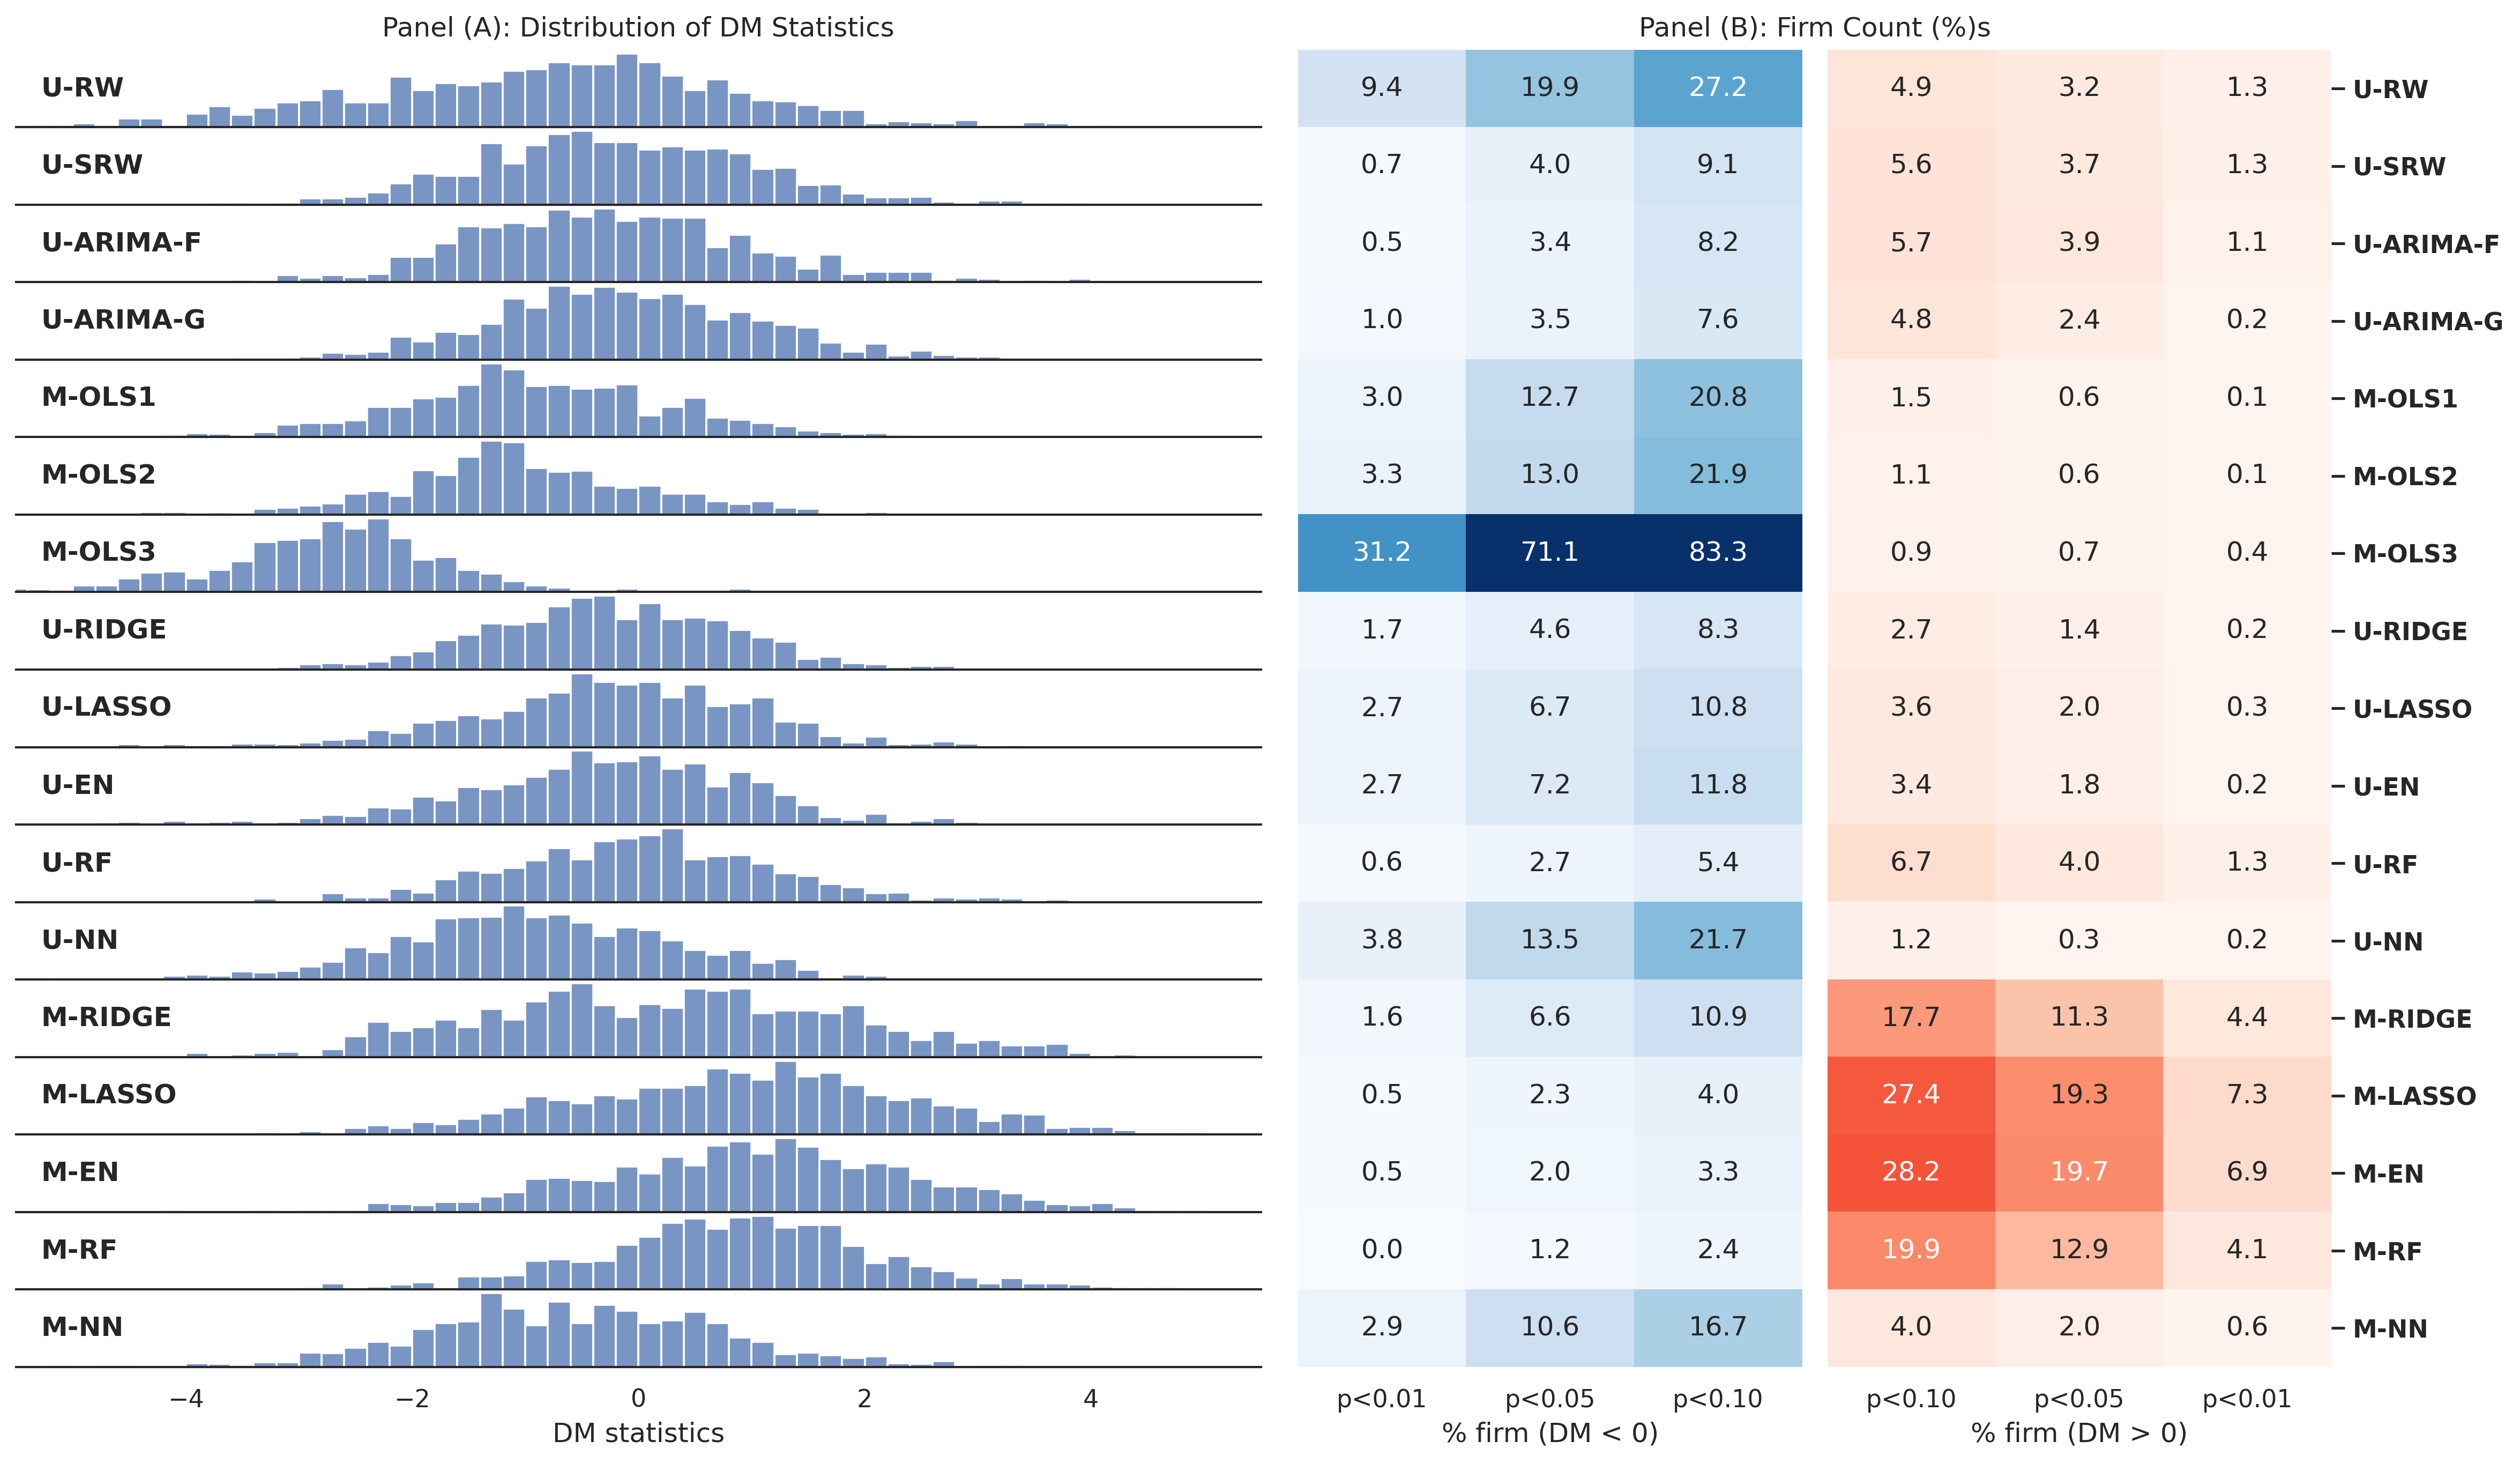

In [33]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model2 = dm_stats["pair"].unique().shape[0]

# single facet の ax のデザイン
def ax_settings(ax, model_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)

    ax.text(0.02, 0.4, model_name, fontsize=None, fontweight="bold", transform = ax.transAxes) 
    return None

# 画像全体のサイズを指定（縦, 横）。
fig = plt.figure(figsize=(16, 9), dpi=300)

# 全体のGridSpec。
gs = GridSpec(
    nrows=num_model2, 
    ncols=3, 
    width_ratios=[2.5, 1, 1], 
    height_ratios=[1]*num_model2, 
    wspace=0.05, 
    hspace=0
    )

# Ridgeline
gs_1 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=1, subplot_spec=gs[:, 0], hspace=0)
# ridgeline の数 + heatmap 2個 の空 ax リスト を作成
axs = [None]*(num_model2 + 2)
# Ridgeline の ax をループで作成
for i in range(num_model2):
    axs[i] = fig.add_subplot(gs_1[i, 0])
    ax_settings(axs[i], model_name_tex[i], -5.5, 5.5)
    # histogram
    sns.histplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], bins='auto', binwidth=0.2, binrange=(-6, 6))
    # kernel density
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], fill=True, alpha=0.5)
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], color="black")

    # 最後のridgeline以外x軸無し
    if i < (num_model2 - 1): 
        axs[i].set_xticks([])
        axs[i].set_xlabel("")
    
    if i == num_model2 - 1:
        axs[i].set_xlabel("DM statistics")

# Heatmap
gs_2 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=2, subplot_spec=gs[:, 1:], wspace=0.05)
# DM < 0
axs[-2] = fig.add_subplot(gs_2[:, 0])
# count
# sns.heatmap(dm_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[-2], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False, cbar_kws={})
# axs[-2].set_title("# firm (DM < 0)")
# percentage
sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/num_firm) * 100, cmap='Blues', ax=axs[-2], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=False, cbar_kws={})
axs[-2].tick_params(bottom=False)
axs[-2].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])
axs[-2].set_xlabel("% firm (DM < 0)")

# DM > 0
axs[-1] = fig.add_subplot(gs_2[:, 1])
# count
# sns.heatmap(dm_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[-1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=True)
# axs[-1].set_title("# firm (DM > 0)")
# percentage
sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/num_firm) * 100, cmap='Reds', ax=axs[-1], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=True) 
axs[-1].tick_params(bottom=False)
axs[-1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])
axs[-1].set_xlabel("% firm (DM > 0)")
axs[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
axs[-1].set_yticklabels(labels=dm_p_count.index, rotation=0, ha='left', weight='bold')

# Add ghost axes and titles on gs_1 and gs_2
ax_left = fig.add_subplot(gs_1[:])
ax_left.axis('off')
ax_left.set_title('Panel (A): Distribution of DM Statistics')

ax_right = fig.add_subplot(gs_2[:])
ax_right.axis('off')
ax_right.set_title('Panel (B): Firm Count (%)s')

# set margins https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(left=0, right=None, bottom=0.06, top=0.97)
plt.savefig("./_dm_MAD_y_hat_sarima_br.pdf")

## IBES MAD (1) = IBES

In [34]:
# prepare data
dm_stats = pd.read_csv("./../../../assets/DM_test_result/dm_stats_vsibes_MAD_y_hat_ibes.csv")

model2_list = [
    '(1) y_hat_ibes vs (2) y_hat_rw',
    '(1) y_hat_ibes vs (2) y_hat_srw',
    '(1) y_hat_ibes vs (2) y_hat_sarima_f',
    '(1) y_hat_ibes vs (2) y_hat_sarima_g',
    '(1) y_hat_ibes vs (2) y_hat_sarima_br',
    '(1) y_hat_ibes vs (2) y_hat_ols1',
    '(1) y_hat_ibes vs (2) y_hat_ols2',
    '(1) y_hat_ibes vs (2) y_hat_ols3', 
    '(1) y_hat_ibes vs (2) y_hat_ul2', 
    '(1) y_hat_ibes vs (2) y_hat_ul1',
    '(1) y_hat_ibes vs (2) y_hat_uen',
    '(1) y_hat_ibes vs (2) y_hat_uraf',
    '(1) y_hat_ibes vs (2) y_hat_umlp',
    '(1) y_hat_ibes vs (2) y_hat_ml2',
    '(1) y_hat_ibes vs (2) y_hat_ml1',
    '(1) y_hat_ibes vs (2) y_hat_men',    
    '(1) y_hat_ibes vs (2) y_hat_mraf',
    '(1) y_hat_ibes vs (2) y_hat_mmlp',
]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
]

dm_stats = dm_stats[dm_stats["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_stats["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# order pair
# https://note.nkmk.me/python-pandas-sort-in-any-order/
dm_stats['order'] = dm_stats['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_stats = dm_stats.sort_values('order')

# number of firm (for percentage count)
num_firm = dm_stats[dm_stats["pair"] == "U-RW"].shape[0]

# prepare data
dm_p_count = pd.read_csv("./../../../assets/DM_test_result/dm_p_count_vsibes_MAD_y_hat_ibes.csv")

dm_p_count = dm_p_count[dm_p_count["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_p_count["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# reorder pair
dm_p_count['order'] = dm_p_count['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_p_count = dm_p_count.sort_values('order')
dm_p_count.set_index("pair", inplace=True)

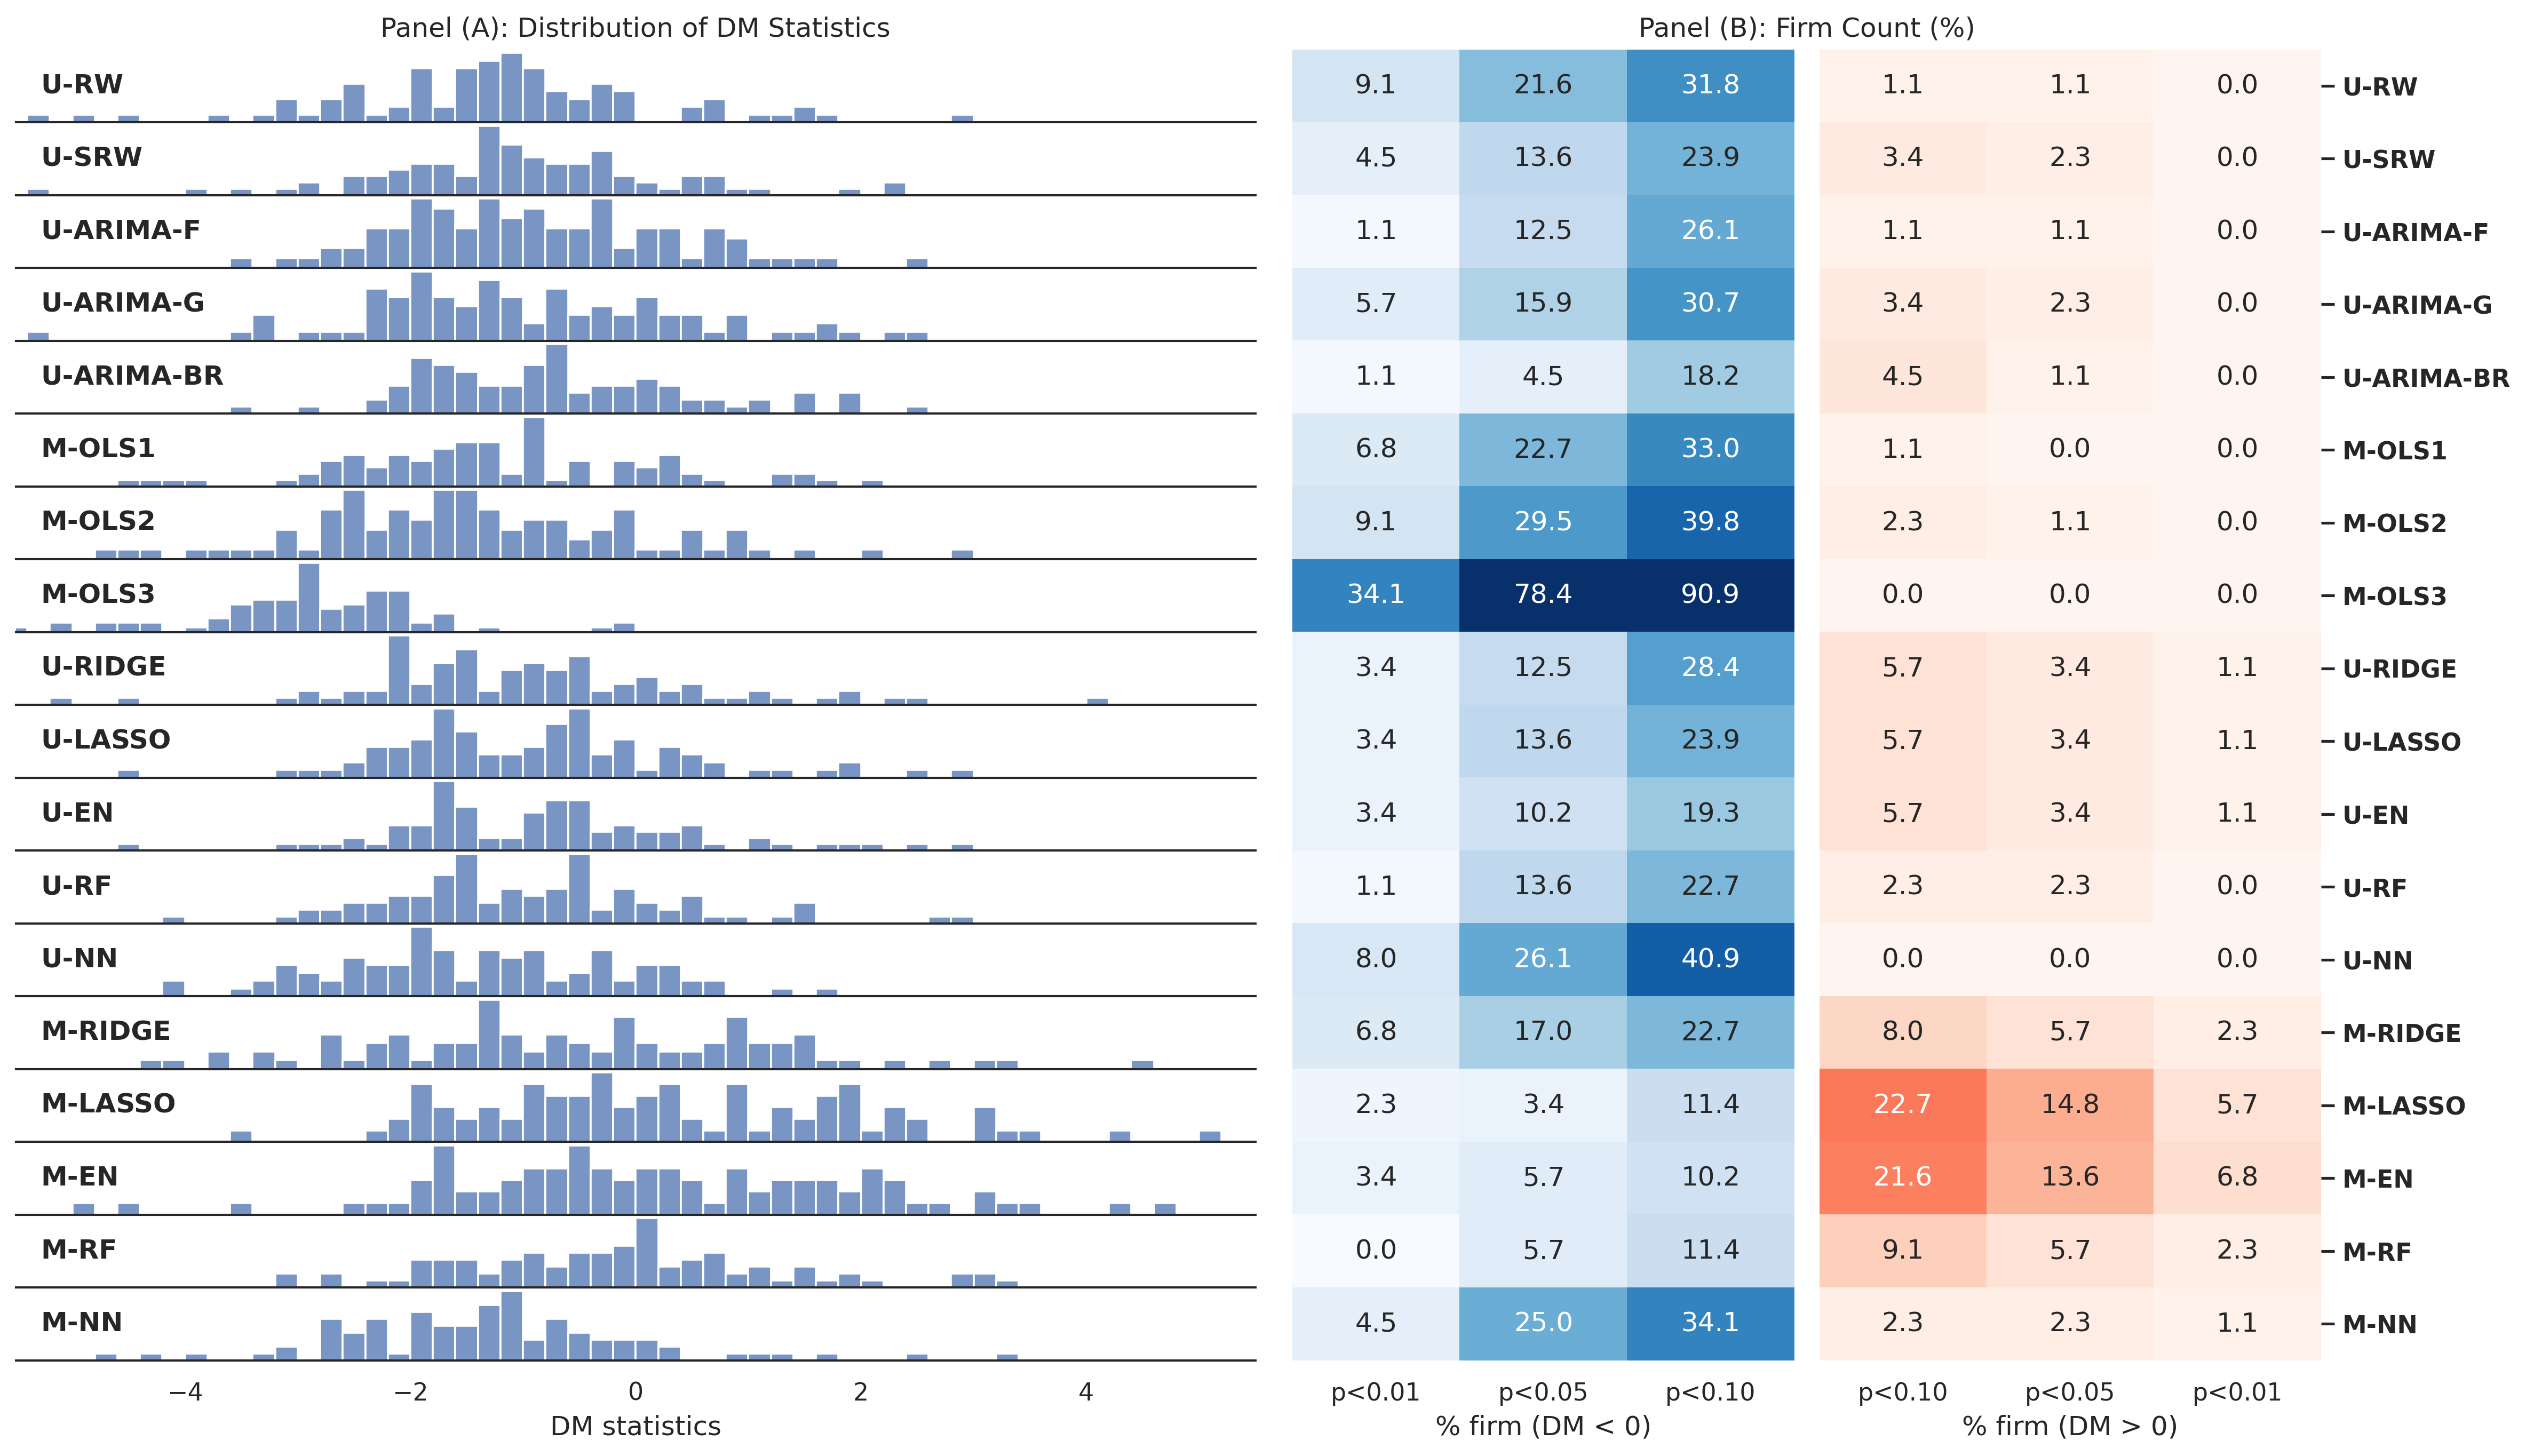

In [35]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model2 = dm_stats["pair"].unique().shape[0]

# single facet の ax のデザイン
def ax_settings(ax, model_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)

    ax.text(0.02, 0.4, model_name, fontsize=None, fontweight="bold", transform = ax.transAxes) 
    return None

# 画像全体のサイズを指定（縦, 横）。
fig = plt.figure(figsize=(16, 9), dpi=300)

# 全体のGridSpec。
gs = GridSpec(
    nrows=num_model2, 
    ncols=3, 
    width_ratios=[2.5, 1, 1], 
    height_ratios=[1]*num_model2, 
    wspace=0.05, 
    hspace=0
    )

# Ridgeline
gs_1 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=1, subplot_spec=gs[:, 0], hspace=0)
# ridgeline の数 + heatmap 2個 の空 ax リスト を作成
axs = [None]*(num_model2 + 2)
# Ridgeline の ax をループで作成
for i in range(num_model2):
    axs[i] = fig.add_subplot(gs_1[i, 0])
    ax_settings(axs[i], model_name_tex[i], -5.5, 5.5)
    # histogram
    sns.histplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], bins='auto', binwidth=0.2, binrange=(-6, 6))
    # kernel density
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], fill=True, alpha=0.5)
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], color="black")

    # 最後のridgeline以外x軸無し
    if i < (num_model2 - 1): 
        axs[i].set_xticks([])
        axs[i].set_xlabel("")
    
    if i == num_model2 - 1:
        axs[i].set_xlabel("DM statistics")

# Heatmap
gs_2 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=2, subplot_spec=gs[:, 1:], wspace=0.05)
# DM < 0
axs[-2] = fig.add_subplot(gs_2[:, 0])
# count
# sns.heatmap(dm_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[-2], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False, cbar_kws={})
# axs[-2].set_title("# firm (DM < 0)")
# percentage
sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/num_firm) * 100, cmap='Blues', ax=axs[-2], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=False, cbar_kws={})
axs[-2].tick_params(bottom=False)
axs[-2].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])
axs[-2].set_xlabel("% firm (DM < 0)")

# DM > 0
axs[-1] = fig.add_subplot(gs_2[:, 1])
# count
# sns.heatmap(dm_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[-1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=True)
# axs[-1].set_title("# firm (DM > 0)")
# percentage
sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/num_firm) * 100, cmap='Reds', ax=axs[-1], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=True) 
axs[-1].tick_params(bottom=False)
axs[-1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])
axs[-1].set_xlabel("% firm (DM > 0)")
axs[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
axs[-1].set_yticklabels(labels=dm_p_count.index, rotation=0, ha='left', weight='bold')

# Add ghost axes and titles on gs_1 and gs_2
ax_left = fig.add_subplot(gs_1[:])
ax_left.axis('off')
ax_left.set_title('Panel (A): Distribution of DM Statistics')

ax_right = fig.add_subplot(gs_2[:])
ax_right.axis('off')
ax_right.set_title('Panel (B): Firm Count (%)')

# set margins https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(left=0, right=None, bottom=0.06, top=0.97)
plt.savefig("./_dm_MAD_y_hat_ibes.pdf")

## IBES MAPE (1) = IBES

In [36]:
# prepare data
dm_stats = pd.read_csv("./../../../assets/DM_test_result/dm_stats_vsibes_MAPE_y_hat_ibes.csv")

model2_list = [
    '(1) y_hat_ibes vs (2) y_hat_rw',
    '(1) y_hat_ibes vs (2) y_hat_srw',
    '(1) y_hat_ibes vs (2) y_hat_sarima_f',
    '(1) y_hat_ibes vs (2) y_hat_sarima_g',
    '(1) y_hat_ibes vs (2) y_hat_sarima_br',
    '(1) y_hat_ibes vs (2) y_hat_ols1',
    '(1) y_hat_ibes vs (2) y_hat_ols2',
    '(1) y_hat_ibes vs (2) y_hat_ols3', 
    '(1) y_hat_ibes vs (2) y_hat_ul2', 
    '(1) y_hat_ibes vs (2) y_hat_ul1',
    '(1) y_hat_ibes vs (2) y_hat_uen',
    '(1) y_hat_ibes vs (2) y_hat_uraf',
    '(1) y_hat_ibes vs (2) y_hat_umlp',
    '(1) y_hat_ibes vs (2) y_hat_ml2',
    '(1) y_hat_ibes vs (2) y_hat_ml1',
    '(1) y_hat_ibes vs (2) y_hat_men',    
    '(1) y_hat_ibes vs (2) y_hat_mraf',
    '(1) y_hat_ibes vs (2) y_hat_mmlp',
]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
]

dm_stats = dm_stats[dm_stats["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_stats["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# order pair
# https://note.nkmk.me/python-pandas-sort-in-any-order/
dm_stats['order'] = dm_stats['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_stats = dm_stats.sort_values('order')

# number of firm (for percentage count)
num_firm = dm_stats[dm_stats["pair"] == "U-RW"].shape[0]

# prepare data
dm_p_count = pd.read_csv("./../../../assets/DM_test_result/dm_p_count_vsibes_MAPE_y_hat_ibes.csv")

dm_p_count = dm_p_count[dm_p_count["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_p_count["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# reorder pair
dm_p_count['order'] = dm_p_count['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_p_count = dm_p_count.sort_values('order')
dm_p_count.set_index("pair", inplace=True)

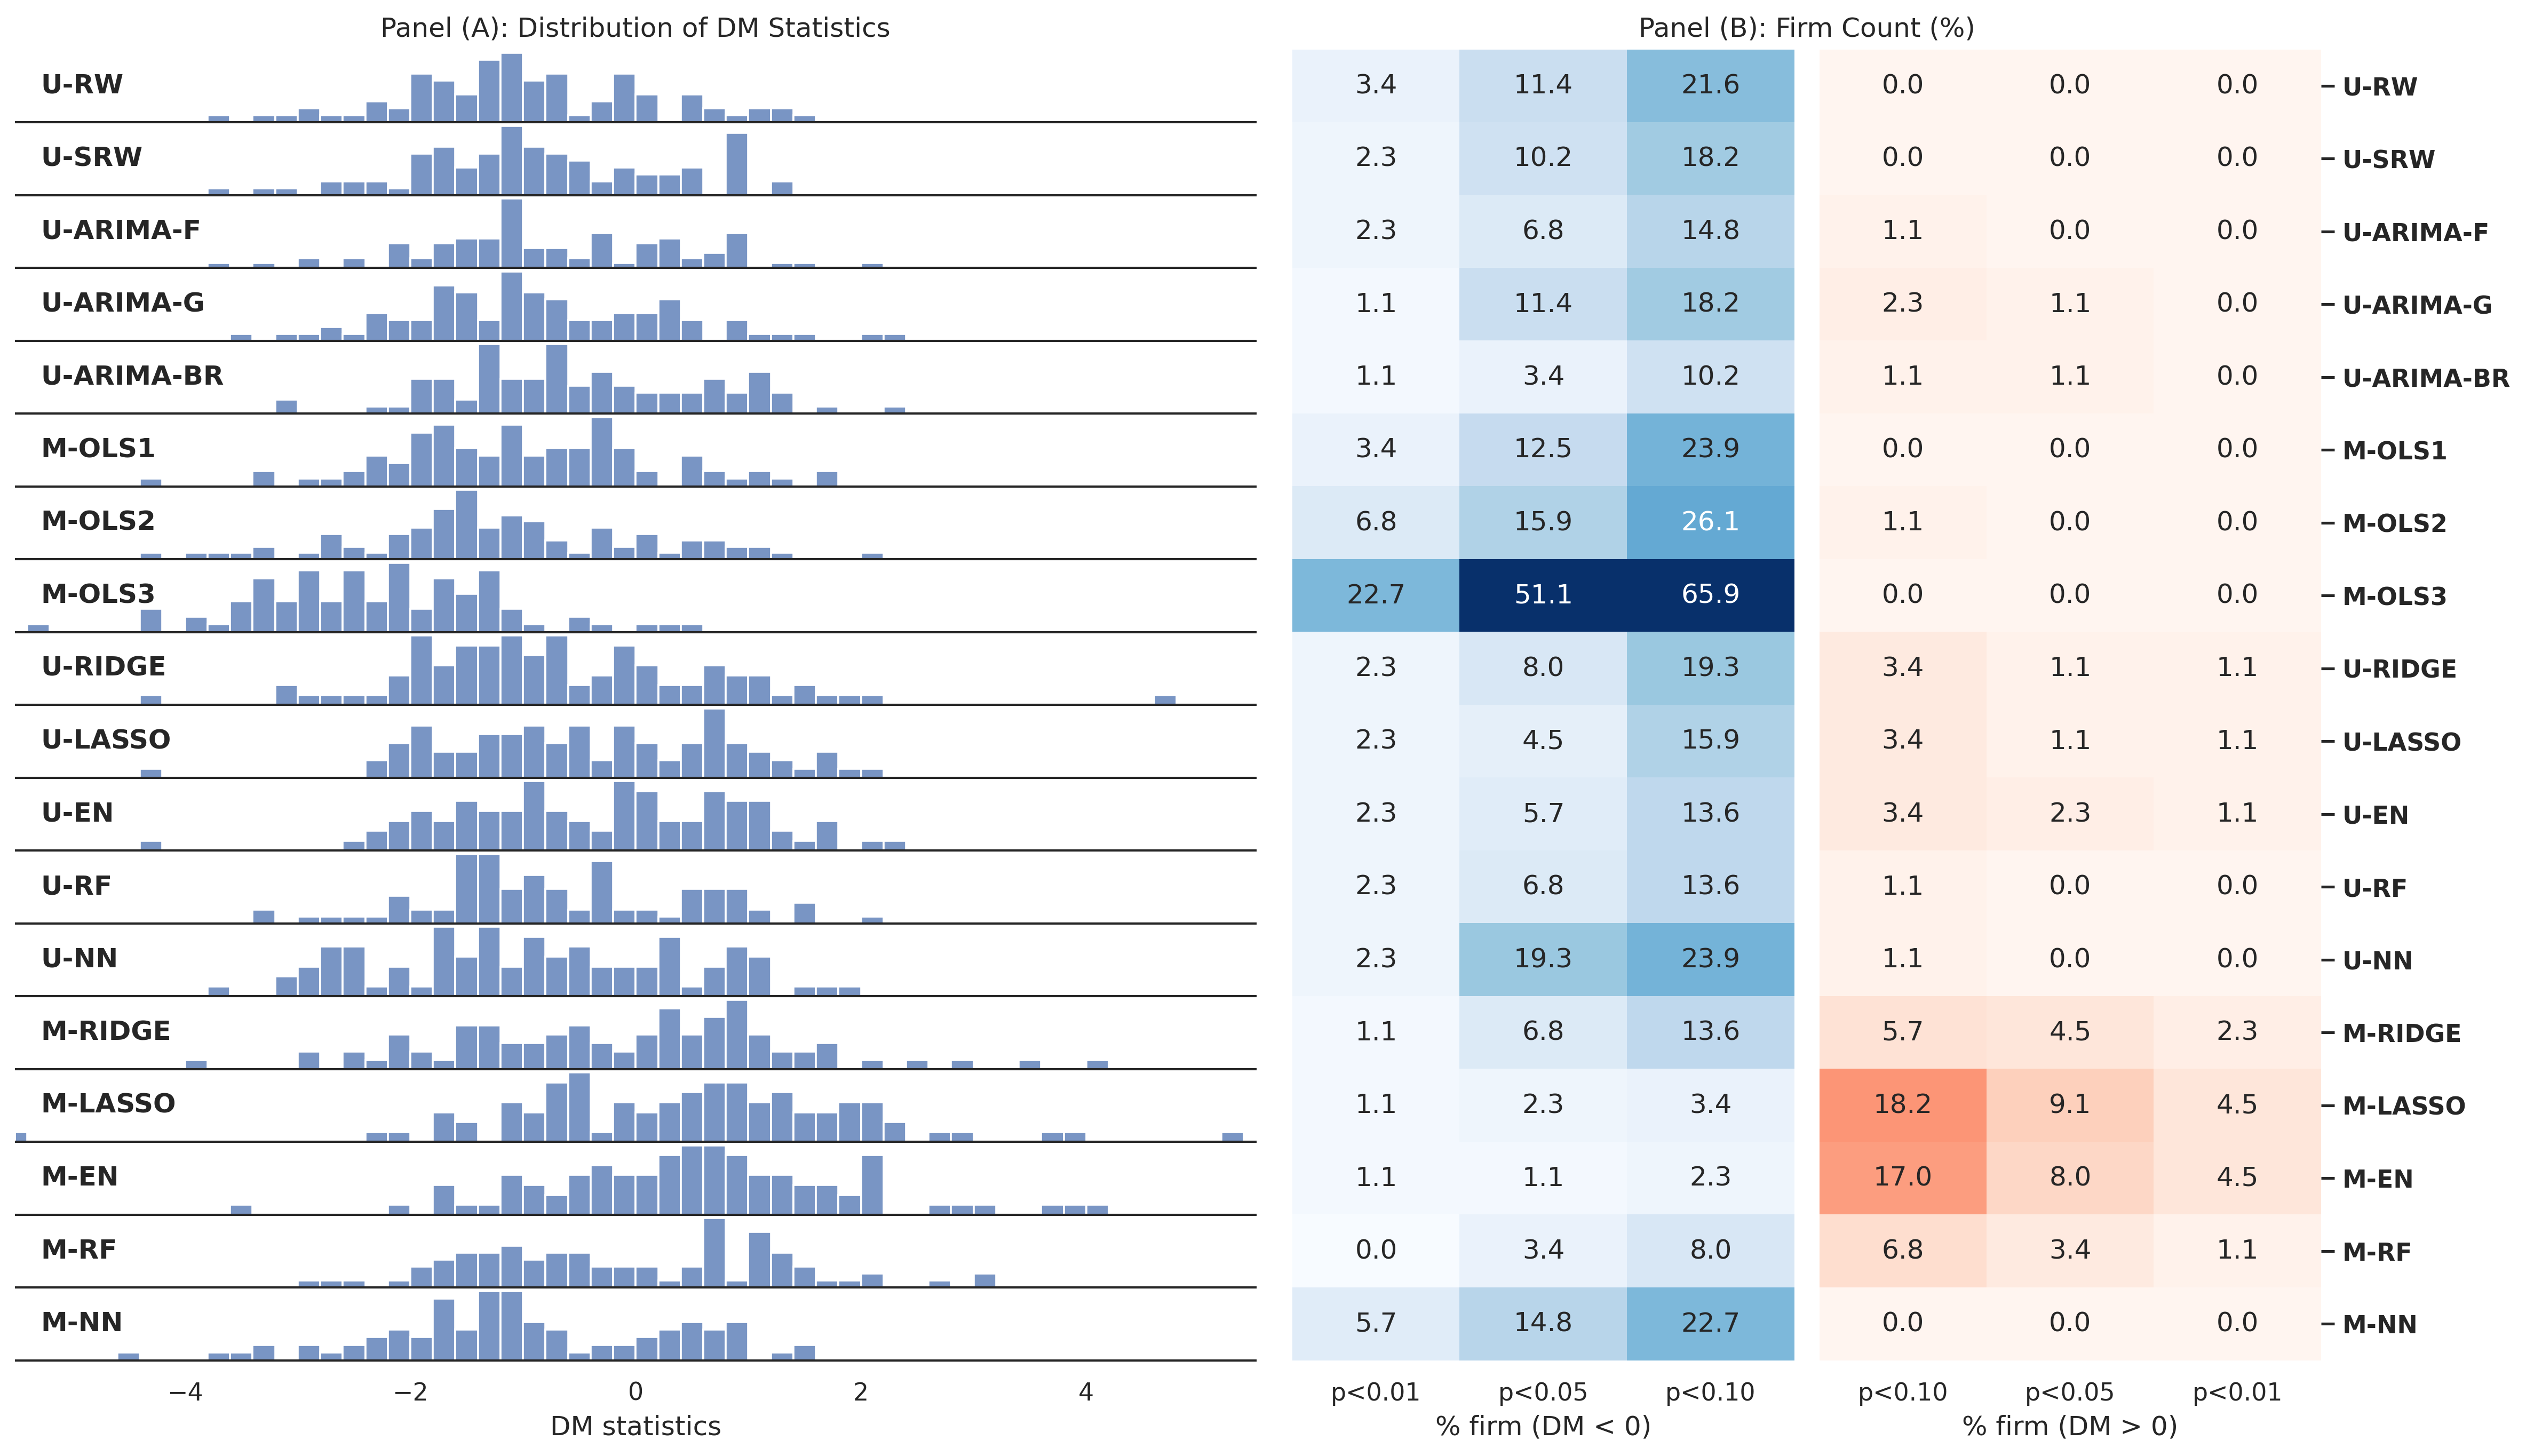

In [37]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model2 = dm_stats["pair"].unique().shape[0]

# single facet の ax のデザイン
def ax_settings(ax, model_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)

    ax.text(0.02, 0.4, model_name, fontsize=None, fontweight="bold", transform = ax.transAxes) 
    return None

# 画像全体のサイズを指定（縦, 横）。
fig = plt.figure(figsize=(16, 9), dpi=300)

# 全体のGridSpec。
gs = GridSpec(
    nrows=num_model2, 
    ncols=3, 
    width_ratios=[2.5, 1, 1], 
    height_ratios=[1]*num_model2, 
    wspace=0.05, 
    hspace=0
    )

# Ridgeline
gs_1 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=1, subplot_spec=gs[:, 0], hspace=0)
# ridgeline の数 + heatmap 2個 の空 ax リスト を作成
axs = [None]*(num_model2 + 2)
# Ridgeline の ax をループで作成
for i in range(num_model2):
    axs[i] = fig.add_subplot(gs_1[i, 0])
    ax_settings(axs[i], model_name_tex[i], -5.5, 5.5)
    # histogram
    sns.histplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], bins='auto', binwidth=0.2, binrange=(-6, 6))
    # kernel density
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], fill=True, alpha=0.5)
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], color="black")

    # 最後のridgeline以外x軸無し
    if i < (num_model2 - 1): 
        axs[i].set_xticks([])
        axs[i].set_xlabel("")
    
    if i == num_model2 - 1:
        axs[i].set_xlabel("DM statistics")

# Heatmap
gs_2 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=2, subplot_spec=gs[:, 1:], wspace=0.05)
# DM < 0
axs[-2] = fig.add_subplot(gs_2[:, 0])
# count
# sns.heatmap(dm_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[-2], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False, cbar_kws={})
# axs[-2].set_title("# firm (DM < 0)")
# percentage
sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/num_firm) * 100, cmap='Blues', ax=axs[-2], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=False, cbar_kws={})
axs[-2].tick_params(bottom=False)
axs[-2].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])
axs[-2].set_xlabel("% firm (DM < 0)")

# DM > 0
axs[-1] = fig.add_subplot(gs_2[:, 1])
# count
# sns.heatmap(dm_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[-1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=True)
# axs[-1].set_title("# firm (DM > 0)")
# percentage
sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/num_firm) * 100, cmap='Reds', ax=axs[-1], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=True) 
axs[-1].tick_params(bottom=False)
axs[-1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])
axs[-1].set_xlabel("% firm (DM > 0)")
axs[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
axs[-1].set_yticklabels(labels=dm_p_count.index, rotation=0, ha='left', weight='bold')

# Add ghost axes and titles on gs_1 and gs_2
ax_left = fig.add_subplot(gs_1[:])
ax_left.axis('off')
ax_left.set_title('Panel (A): Distribution of DM Statistics')

ax_right = fig.add_subplot(gs_2[:])
ax_right.axis('off')
ax_right.set_title('Panel (B): Firm Count (%)')

# set margins https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(left=0, right=None, bottom=0.06, top=0.97)
plt.savefig("./_dm_MAPE_y_hat_ibes.pdf")

## IBES MSPE

In [38]:
# prepare data
dm_stats = pd.read_csv("./../../../assets/DM_test_result/dm_stats_vsibes_MSPE_y_hat_ibes.csv")

model2_list = [
    '(1) y_hat_ibes vs (2) y_hat_rw',
    '(1) y_hat_ibes vs (2) y_hat_srw',
    '(1) y_hat_ibes vs (2) y_hat_sarima_f',
    '(1) y_hat_ibes vs (2) y_hat_sarima_g',
    '(1) y_hat_ibes vs (2) y_hat_sarima_br',
    '(1) y_hat_ibes vs (2) y_hat_ols1',
    '(1) y_hat_ibes vs (2) y_hat_ols2',
    '(1) y_hat_ibes vs (2) y_hat_ols3', 
    '(1) y_hat_ibes vs (2) y_hat_ul2', 
    '(1) y_hat_ibes vs (2) y_hat_ul1',
    '(1) y_hat_ibes vs (2) y_hat_uen',
    '(1) y_hat_ibes vs (2) y_hat_uraf',
    '(1) y_hat_ibes vs (2) y_hat_umlp',
    '(1) y_hat_ibes vs (2) y_hat_ml2',
    '(1) y_hat_ibes vs (2) y_hat_ml1',
    '(1) y_hat_ibes vs (2) y_hat_men',    
    '(1) y_hat_ibes vs (2) y_hat_mraf',
    '(1) y_hat_ibes vs (2) y_hat_mmlp',
]

model_name_tex = [
    "U-RW",
    "U-SRW",
    "U-ARIMA-F",
    "U-ARIMA-G",
    "U-ARIMA-BR",
    "M-OLS1",
    "M-OLS2",
    "M-OLS3",
    "U-RIDGE",
    "U-LASSO",
    "U-EN",
    "U-RF",
    "U-NN",
    "M-RIDGE",
    "M-LASSO",
    "M-EN",
    "M-RF",
    "M-NN",
]

dm_stats = dm_stats[dm_stats["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_stats["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# order pair
# https://note.nkmk.me/python-pandas-sort-in-any-order/
dm_stats['order'] = dm_stats['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_stats = dm_stats.sort_values('order')

# number of firm (for percentage count)
num_firm = dm_stats[dm_stats["pair"] == "U-RW"].shape[0]

# prepare data
dm_p_count = pd.read_csv("./../../../assets/DM_test_result/dm_p_count_vsibes_MSPE_y_hat_ibes.csv")

dm_p_count = dm_p_count[dm_p_count["pair"].isin(model2_list)]

# replace model name
for i in range(len(model2_list)):
    # print(model2_list[i], model_name_tex[i])
    dm_p_count["pair"].replace(model2_list[i], model_name_tex[i], inplace=True)

# reorder pair
dm_p_count['order'] = dm_p_count['pair'].apply(lambda x: model_name_tex.index(x) if x in model_name_tex else -1)
dm_p_count = dm_p_count.sort_values('order')
dm_p_count.set_index("pair", inplace=True)

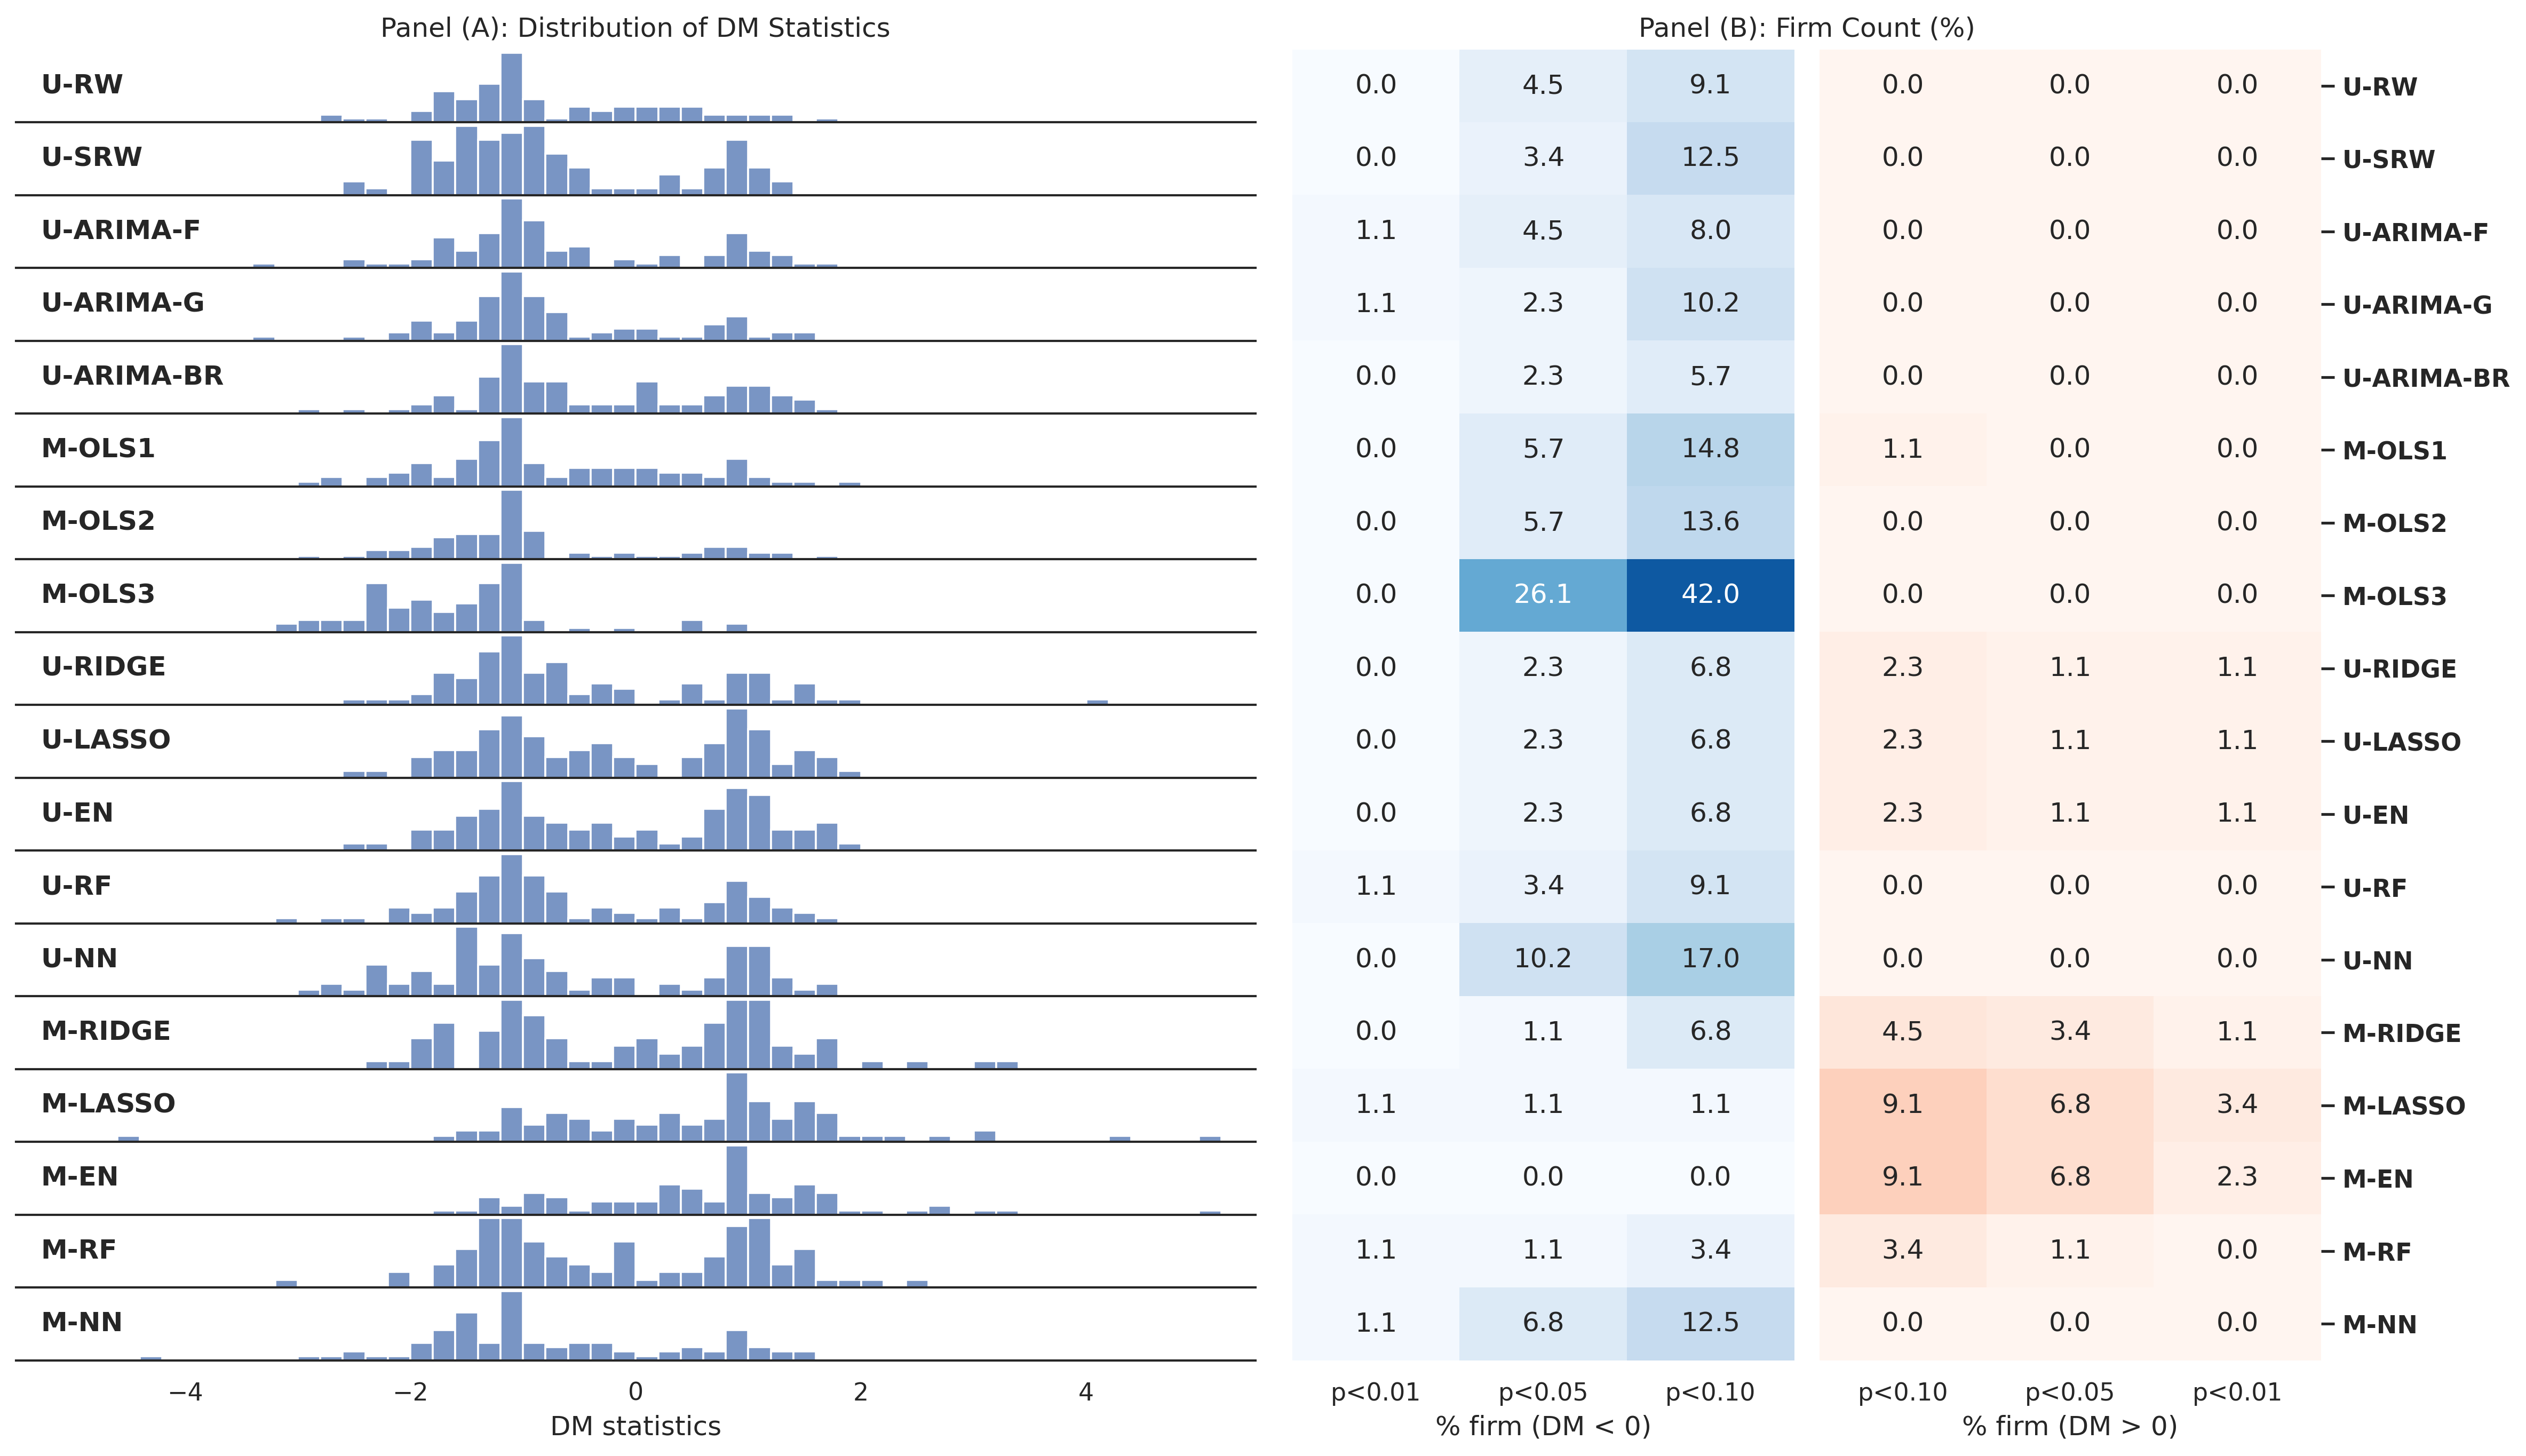

In [39]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# ridgeline の single facet の数
num_model2 = dm_stats["pair"].unique().shape[0]

# single facet の ax のデザイン
def ax_settings(ax, model_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(1)

    ax.text(0.02, 0.4, model_name, fontsize=None, fontweight="bold", transform = ax.transAxes) 
    return None

# 画像全体のサイズを指定（縦, 横）。
fig = plt.figure(figsize=(16, 9), dpi=300)

# 全体のGridSpec。
gs = GridSpec(
    nrows=num_model2, 
    ncols=3, 
    width_ratios=[2.5, 1, 1], 
    height_ratios=[1]*num_model2, 
    wspace=0.05, 
    hspace=0
    )

# Ridgeline
gs_1 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=1, subplot_spec=gs[:, 0], hspace=0)
# ridgeline の数 + heatmap 2個 の空 ax リスト を作成
axs = [None]*(num_model2 + 2)
# Ridgeline の ax をループで作成
for i in range(num_model2):
    axs[i] = fig.add_subplot(gs_1[i, 0])
    ax_settings(axs[i], model_name_tex[i], -5.5, 5.5)
    # histogram
    sns.histplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], bins='auto', binwidth=0.2, binrange=(-6, 6))
    # kernel density
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], fill=True, alpha=0.5)
    # sns.kdeplot(x=dm_stats["DM"][dm_stats["pair"]==model_name_tex[i]], color="black")

    # 最後のridgeline以外x軸無し
    if i < (num_model2 - 1): 
        axs[i].set_xticks([])
        axs[i].set_xlabel("")
    
    if i == num_model2 - 1:
        axs[i].set_xlabel("DM statistics")

# Heatmap
gs_2 = GridSpecFromSubplotSpec(nrows=num_model2, ncols=2, subplot_spec=gs[:, 1:], wspace=0.05)
# DM < 0
axs[-2] = fig.add_subplot(gs_2[:, 0])
# count
# sns.heatmap(dm_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[-2], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False, cbar_kws={})
# axs[-2].set_title("# firm (DM < 0)")
# percentage
sns.heatmap((dm_p_count[["p_1n", "p_5n", "p_10n"]].values/num_firm) * 100, cmap='Blues', ax=axs[-2], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=False, cbar_kws={})
axs[-2].tick_params(bottom=False)
axs[-2].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"])
axs[-2].set_xlabel("% firm (DM < 0)")

# DM > 0
axs[-1] = fig.add_subplot(gs_2[:, 1])
# count
# sns.heatmap(dm_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[-1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=True)
# axs[-1].set_title("# firm (DM > 0)")
# percentage
sns.heatmap((dm_p_count[["p_10p", "p_5p", "p_1p"]].values/num_firm) * 100, cmap='Reds', ax=axs[-1], vmax=50, vmin=0, annot=True, fmt=".1f", cbar=False, yticklabels=True) 
axs[-1].tick_params(bottom=False)
axs[-1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"])
axs[-1].set_xlabel("% firm (DM > 0)")
axs[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
axs[-1].set_yticklabels(labels=dm_p_count.index, rotation=0, ha='left', weight='bold')

# Add ghost axes and titles on gs_1 and gs_2
ax_left = fig.add_subplot(gs_1[:])
ax_left.axis('off')
ax_left.set_title('Panel (A): Distribution of DM Statistics')

ax_right = fig.add_subplot(gs_2[:])
ax_right.axis('off')
ax_right.set_title('Panel (B): Firm Count (%)')

# set margins https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(left=0, right=None, bottom=0.06, top=0.97)
plt.savefig("./_dm_MSPE_y_hat_ibes.pdf")